In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb, to_hex

sns.set_theme(style="whitegrid", palette="pastel")

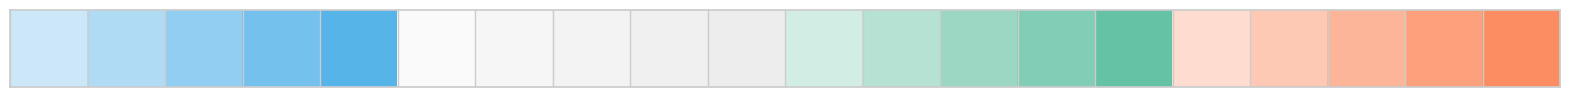

In [2]:
#Color palette for all visualizations for the article

def generate_shades(base_color, n_shades=5):
    rgb = np.array(to_rgb(base_color))
    shades = [to_hex((rgb * t + np.array([1,1,1])*(1-t))) for t in np.linspace(0.3, 1, n_shades)]
    return shades

base_colors = ["#56B4E9", "#ededed", "#66c2a5","#FC8D62"]

expanded_palette = []
for color in base_colors:
    expanded_palette.extend(generate_shades(color, n_shades=5))

expanded_palette = sns.color_palette(expanded_palette)
#sns.set_palette(expanded_palette)

sns.palplot(expanded_palette)
plt.show()

## Metrics Plots

In [3]:
dfMetrics1= pd.read_csv('summaryMetrics.csv', index_col=0)
dfMetrics2 = pd.read_csv('summaryMetrics2.csv', index_col=0)
dfMetrics2 = dfMetrics2.reset_index(drop=True)

In [4]:
dfMetrics1.rename(columns={'impuType': 'Imputation', 'metricName':'Performance Metric', 'metricNumber': 'Score'}, inplace=True)
dfMetrics1['Imputation'] = dfMetrics1['Imputation'].replace('missforestMetrics', 'MissForest')
dfMetrics1['Imputation'] = dfMetrics1['Imputation'].replace('probsMetrics', 'ProbImpute+MissForest')


In [5]:

dfMetrics2.rename(columns={'impuType': 'Imputation', 'dataset':'Dataset'}, inplace=True)
dfMetrics2['Imputation'] = dfMetrics2['Imputation'].replace('missforestMetrics', 'MissForest')
dfMetrics2['Imputation'] = dfMetrics2['Imputation'].replace('probsMetrics', 'ProbImpute+MissForest')

In [6]:
dfMetrics1

,Method,Binarization,Imputation,dataset,Performance Metric,Score
0,MIBNI,{BASC A},MissForest,P53-MDM2,Dynamic Accuracy,0.833333
1,MIBNI,{K-Means},MissForest,P53-MDM2,Dynamic Accuracy,0.583333
2,MIBNI,{Onestep},MissForest,P53-MDM2,Dynamic Accuracy,0.541667
3,MIBNI,"{BASC A, K-Means}",MissForest,P53-MDM2,Dynamic Accuracy,0.833333
4,MIBNI,"{BASC A, Onestep}",MissForest,P53-MDM2,Dynamic Accuracy,0.833333
...,...,...,...,...,...,...
625,Bestfit,{Onestep},ProbImpute+MissForest,yeast_cell,F1-Score,0.250000
626,Bestfit,"{BASC A, K-Means}",ProbImpute+MissForest,yeast_cell,F1-Score,0.363636
627,Bestfit,"{BASC A, Onestep}",ProbImpute+MissForest,yeast_cell,F1-Score,0.258065
628,Bestfit,"{K-Means, Onestep}",ProbImpute+MissForest,yeast_cell,F1-Score,0.250000


In [7]:
dfMetrics2

,Method,Binarization,Dynamic Accuracy,Accuracy,Precision,Recall,F1-Score,Imputation,Dataset
0,MIBNI,{BASC A},0.833333,0.600000,0.714286,0.714286,0.714286,MissForest,P53-MDM2
1,MIBNI,{K-Means},0.583333,0.600000,0.714286,0.714286,0.714286,MissForest,P53-MDM2
2,MIBNI,{Onestep},0.541667,0.700000,0.700000,1.000000,0.823529,MissForest,P53-MDM2
3,MIBNI,"{BASC A, K-Means}",0.833333,0.600000,0.714286,0.714286,0.714286,MissForest,P53-MDM2
4,MIBNI,"{BASC A, Onestep}",0.833333,0.600000,0.714286,0.714286,0.714286,MissForest,P53-MDM2
...,...,...,...,...,...,...,...,...,...
121,Bestfit,{Onestep},0.649573,0.466667,0.285714,0.222222,0.250000,ProbImpute+MissForest,yeast_cell
122,Bestfit,"{BASC A, K-Means}",0.709402,0.533333,0.400000,0.333333,0.363636,ProbImpute+MissForest,yeast_cell
123,Bestfit,"{BASC A, Onestep}",0.735043,0.488889,0.307692,0.222222,0.258065,ProbImpute+MissForest,yeast_cell
124,Bestfit,"{K-Means, Onestep}",0.649573,0.466667,0.285714,0.222222,0.250000,ProbImpute+MissForest,yeast_cell


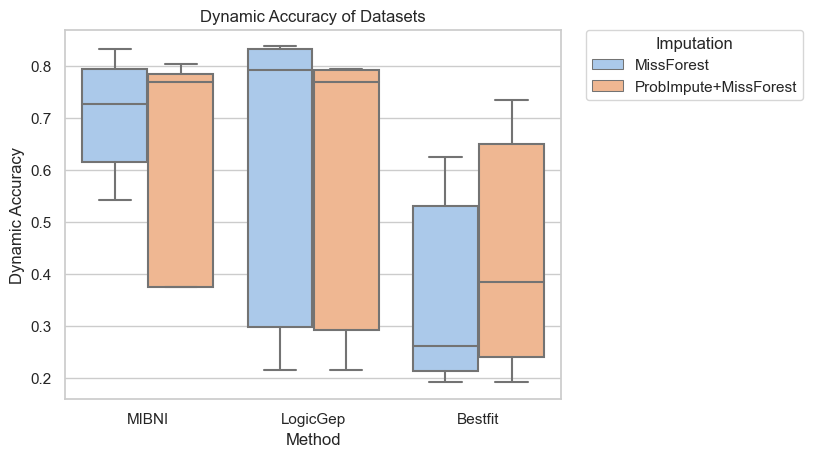

In [8]:
# boxplot of all binarizations accuracy by inference method and type of value impu
sns.boxplot(data=dfMetrics2, x="Method", y="Dynamic Accuracy", hue="Imputation").set(title='Dynamic Accuracy of Datasets')
plt.legend(title="Imputation", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
"""
# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define new labels
new_labels = ['MissForest', 'ProbImpute+MissForest'] 

# Recreate the legend with new labels and title
plt.legend(handles=handles, labels=new_labels, title="Imputation")"""
plt.savefig("./plots/dynamicAccBoxPlot.png", dpi=300, bbox_inches="tight")


/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


'\nlegend = g.legend\n# Change the legend title\nlegend.set_title("Imputation")\n\n# Change the legend labels\n# You need to get the current labels and then set new ones in the correct order\nnew_labels = [\'MissForest\', \'ProbImpute+MissForest\'] \nfor t, l in zip(legend.texts, new_labels):\n    t.set_text(l)'

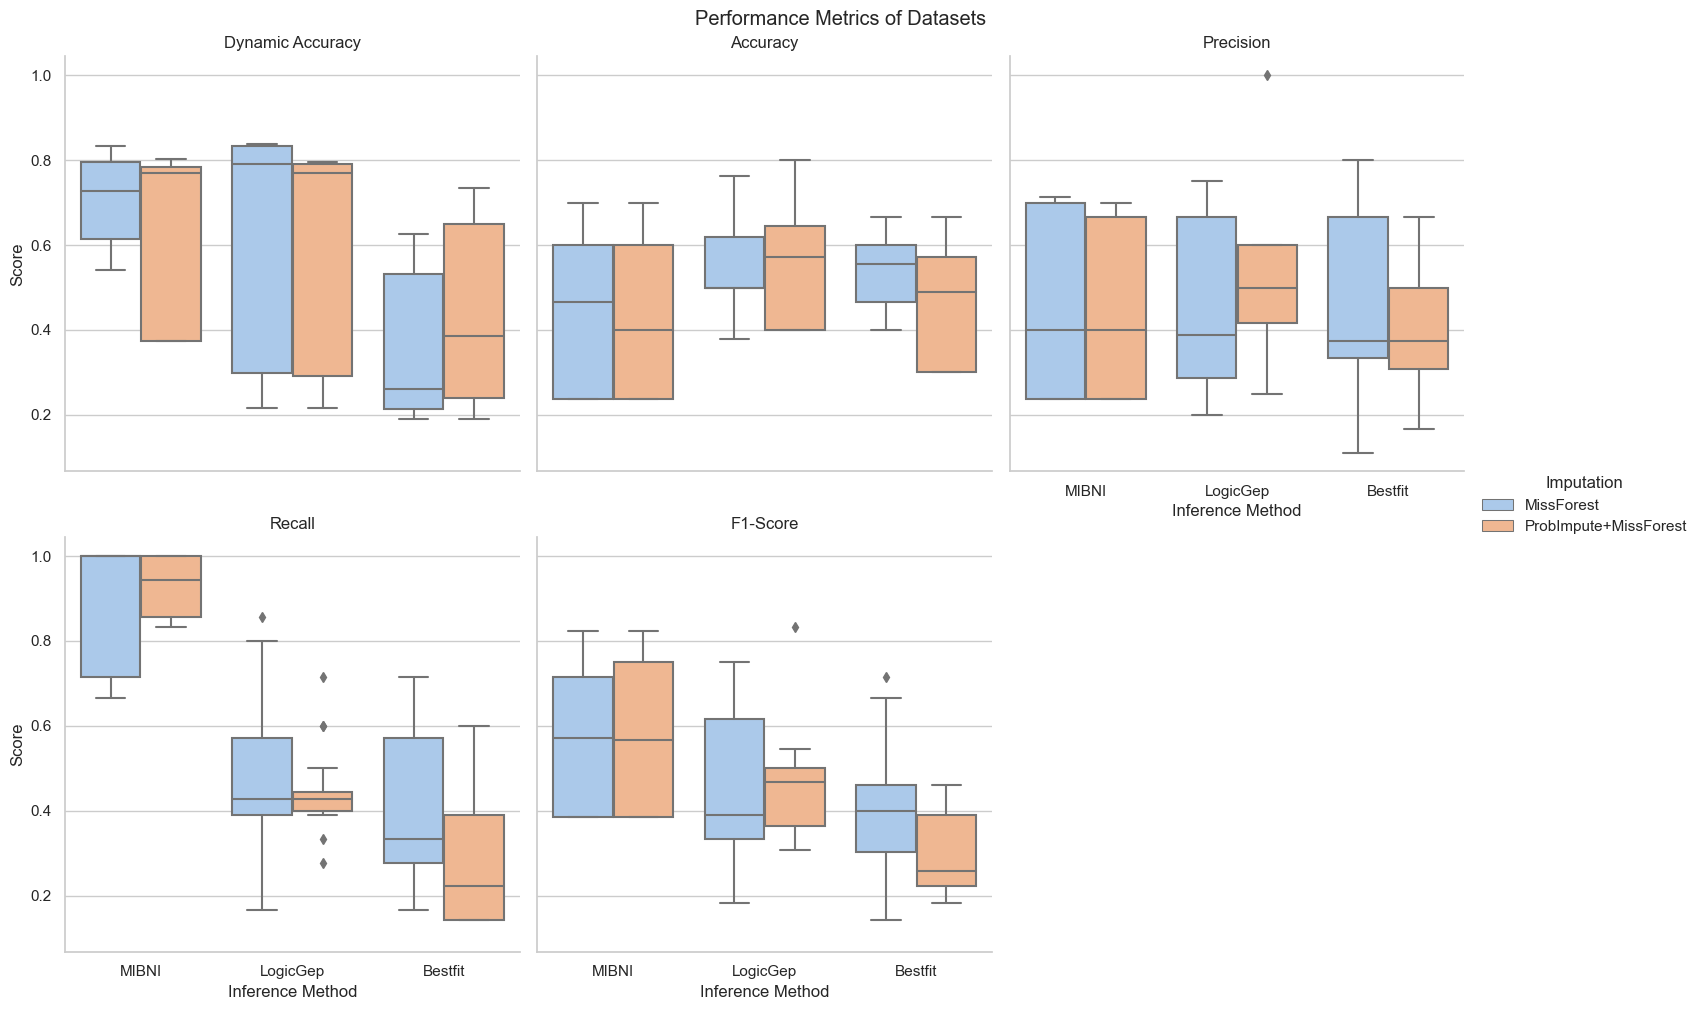

In [9]:

g = sns.catplot(data=dfMetrics1, x="Method", y="Score", col="Performance Metric", hue="Imputation", kind="box", col_wrap=3)
g.set_axis_labels("Inference Method")
g.set_titles("{col_name}")
g.fig.suptitle(x=0.5, y=1.008, t='Performance Metrics of Datasets')
plt.savefig("./plots/BoxPlotMetrics.png", dpi=300, bbox_inches="tight")
"""
legend = g.legend
# Change the legend title
legend.set_title("Imputation")

# Change the legend labels
# You need to get the current labels and then set new ones in the correct order
new_labels = ['MissForest', 'ProbImpute+MissForest'] 
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)"""

In [10]:
dfMetrics1[dfMetrics1['dataset']=='yeast_cell'].head(20)


,Method,Binarization,Imputation,dataset,Performance Metric,Score
84,MIBNI,{BASC A},MissForest,yeast_cell,Dynamic Accuracy,0.615385
85,MIBNI,{K-Means},MissForest,yeast_cell,Dynamic Accuracy,0.717949
86,MIBNI,{Onestep},MissForest,yeast_cell,Dynamic Accuracy,0.623932
87,MIBNI,"{BASC A, K-Means}",MissForest,yeast_cell,Dynamic Accuracy,0.615385
88,MIBNI,"{BASC A, Onestep}",MissForest,yeast_cell,Dynamic Accuracy,0.726496
89,MIBNI,"{K-Means, Onestep}",MissForest,yeast_cell,Dynamic Accuracy,0.623932
90,MIBNI,"{BASC A, K-Means, Onestep}",MissForest,yeast_cell,Dynamic Accuracy,0.606838
91,LogicGep,{BASC A},MissForest,yeast_cell,Dynamic Accuracy,0.837607
92,LogicGep,{K-Means},MissForest,yeast_cell,Dynamic Accuracy,0.658120
93,LogicGep,{Onestep},MissForest,yeast_cell,Dynamic Accuracy,0.837607


In [11]:
list(dfMetrics1['dataset'].unique())

['P53-MDM2', 'ecoli_data', 'yeast_cell']

/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


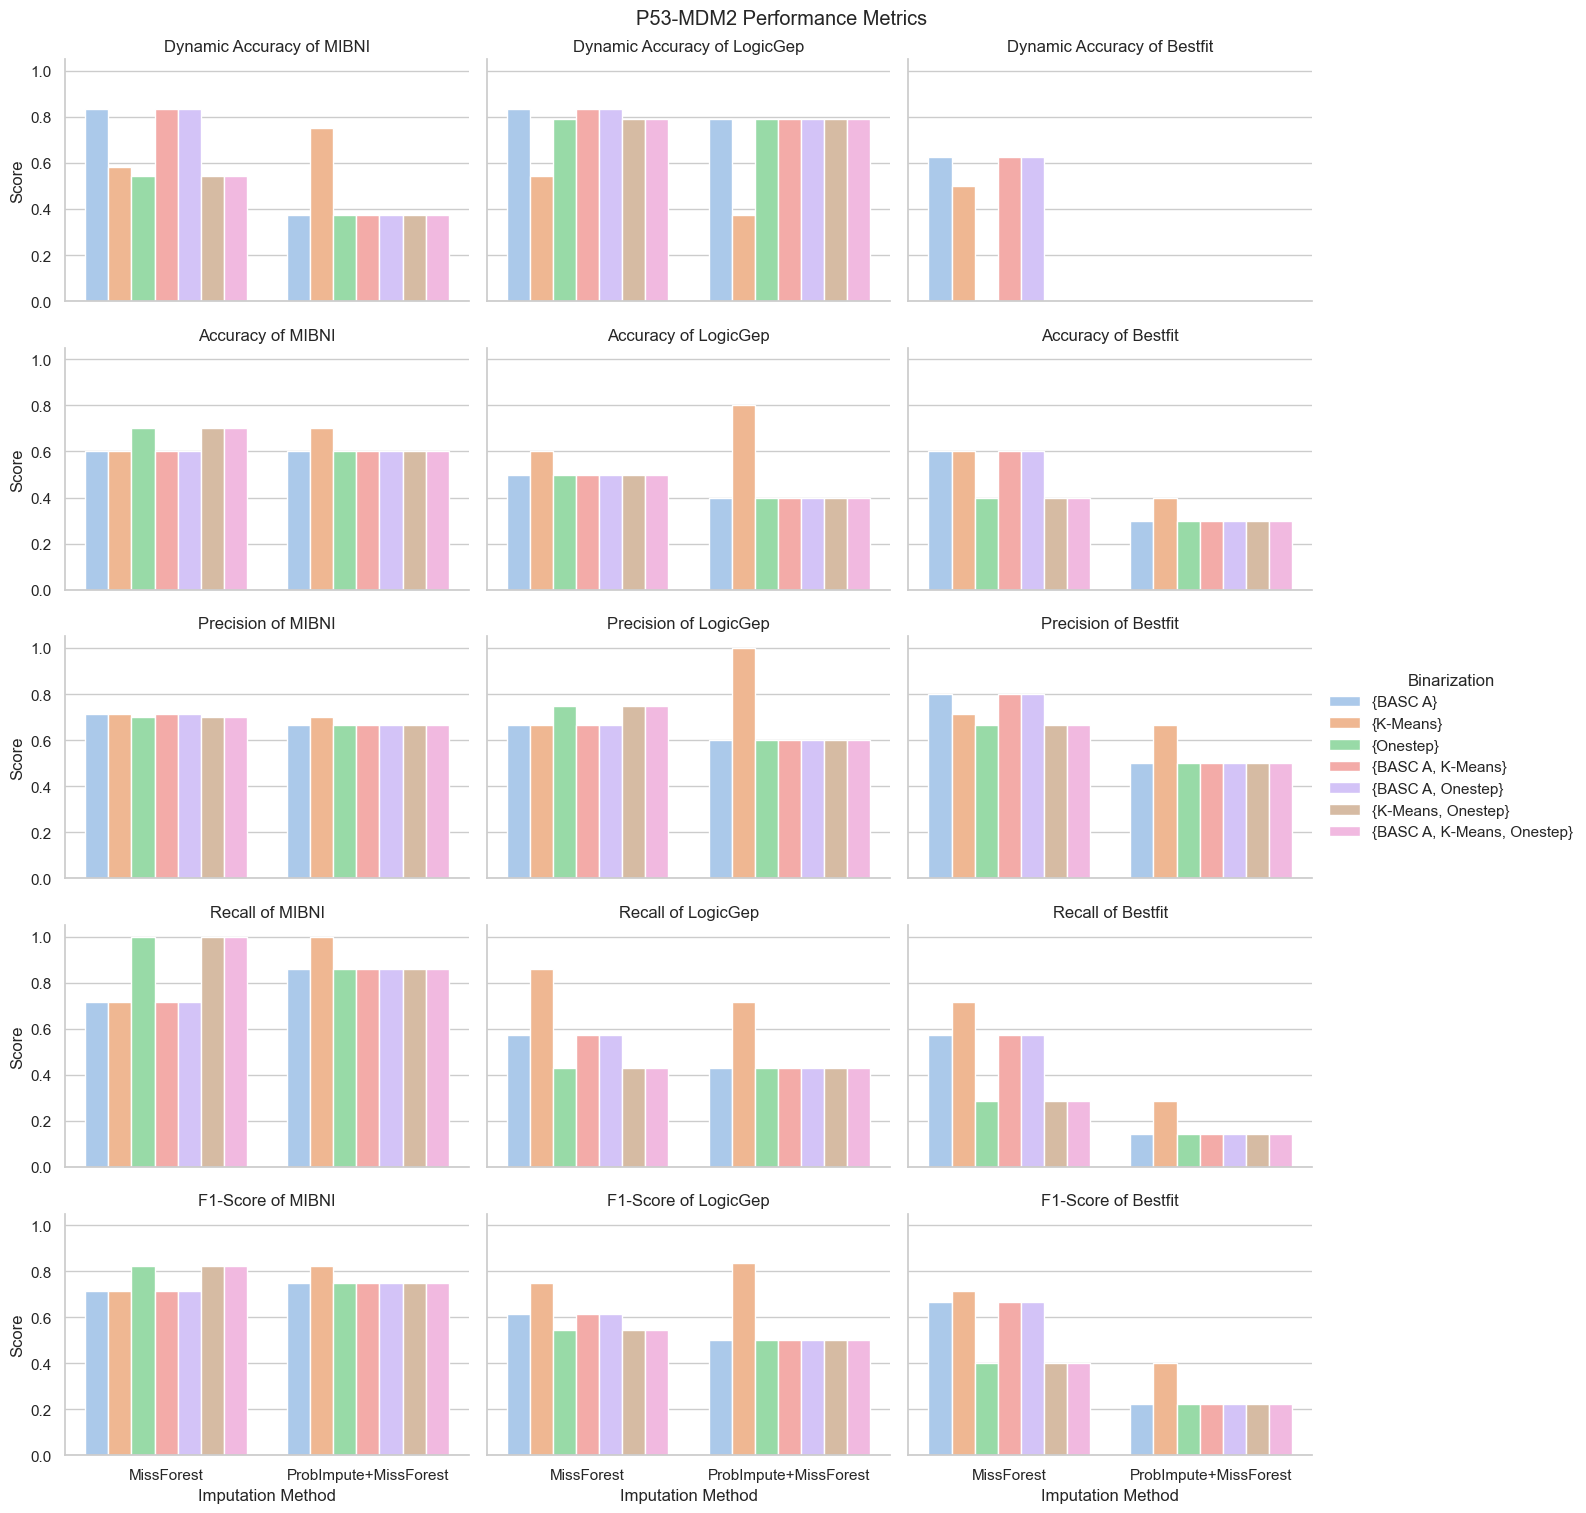

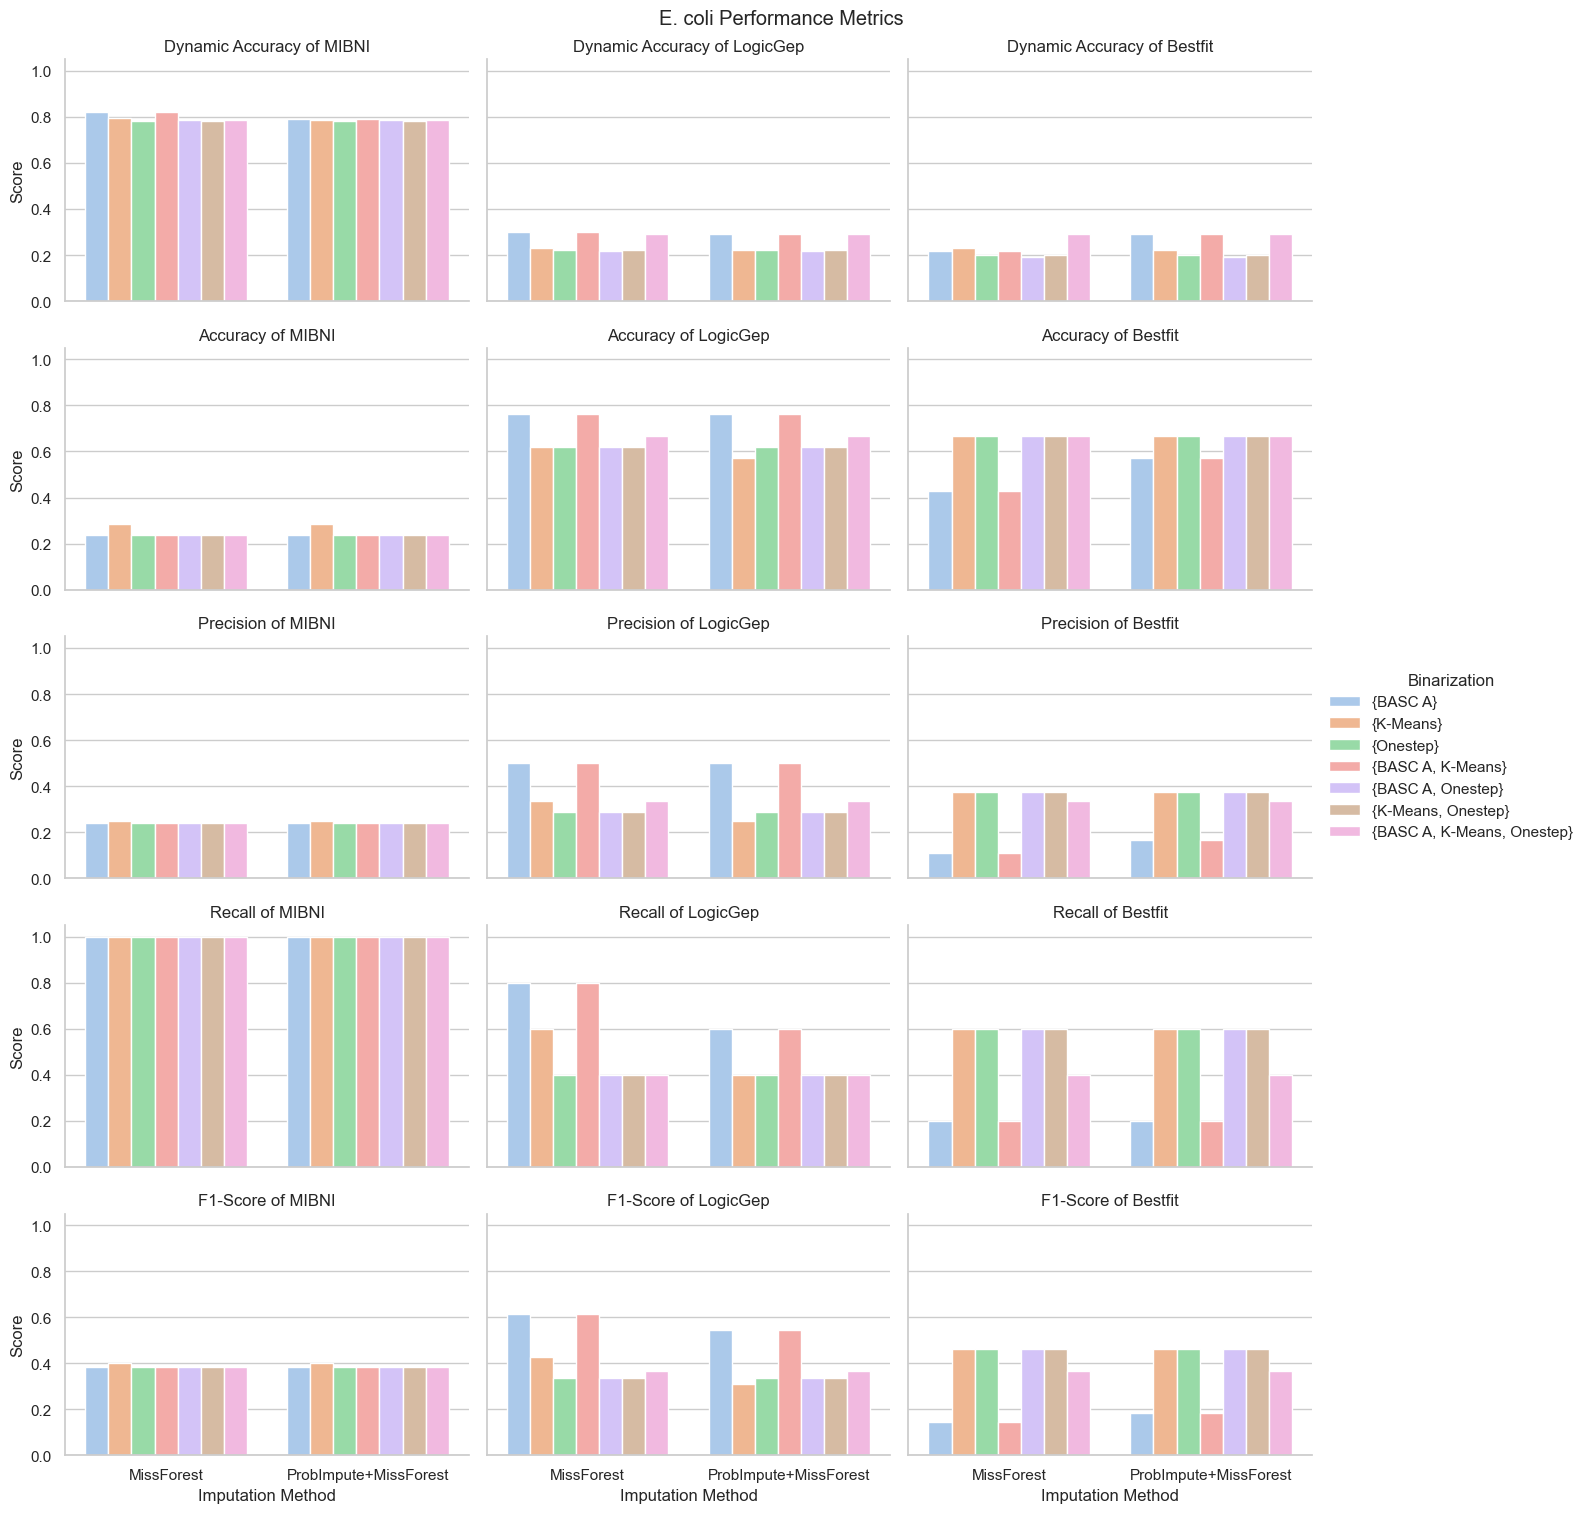

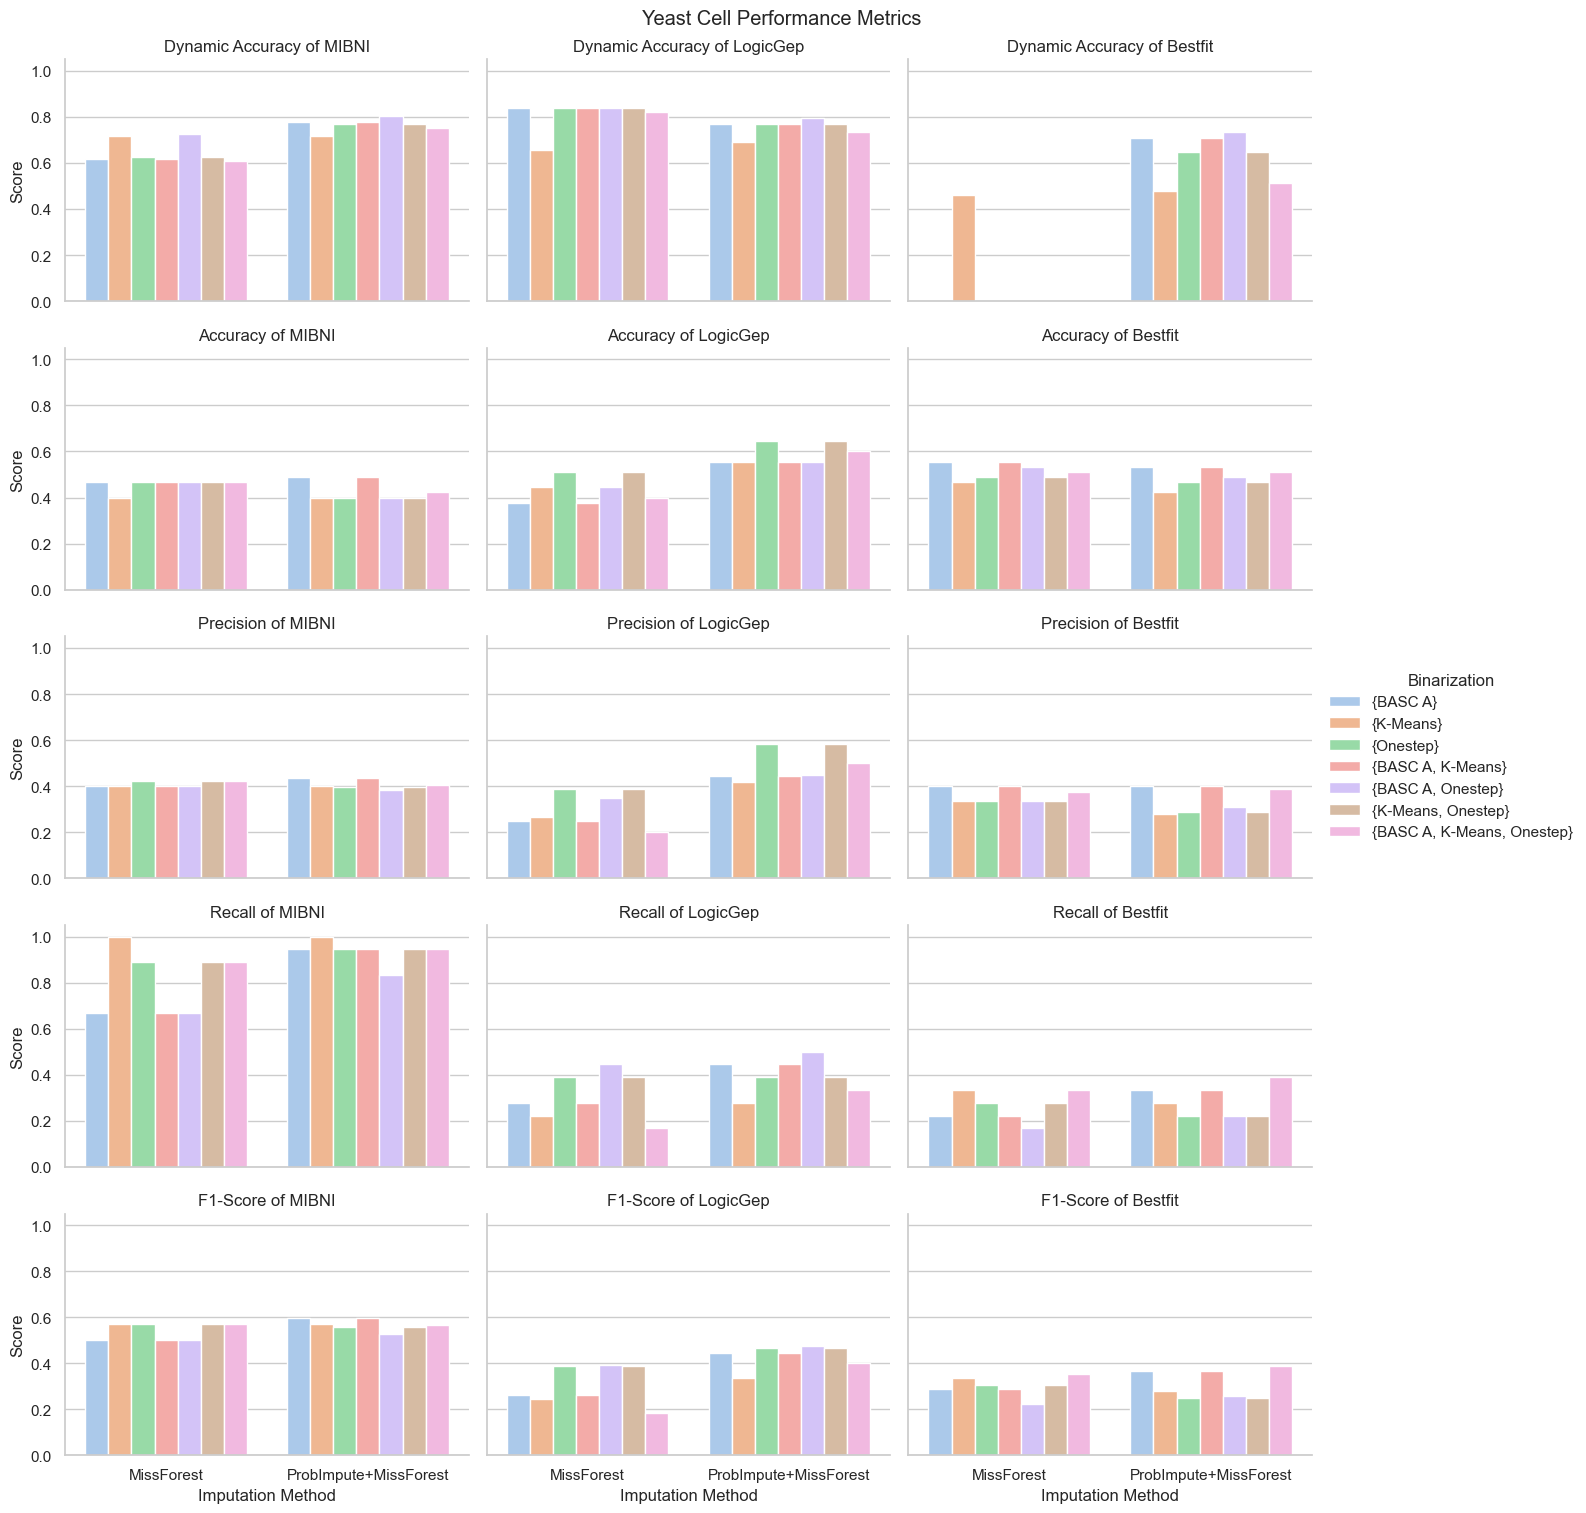

In [12]:
#gridplot showing the metrics by inference method and imputation method

row_labels = ["Dynamic Accuracy", "Accuracy", "Precision", "Recall", "F1-Score"]

datasets = list(dfMetrics1['dataset'].unique())

for d in datasets:
    if d == 'yeast_cell':
        label = 'Yeast Cell'
    elif d == 'ecoli_data':
        label = 'E. coli'
    else:
        label = d
    g = sns.catplot(data=dfMetrics1[dfMetrics1['dataset']==d], x="Imputation", y="Score", row="Performance Metric", col="Method", hue="Binarization", kind="bar", height=3, aspect=1.5)
    g.set_axis_labels("Imputation Method")
    g.set_titles("{row_name} of {col_name}")
    g.fig.suptitle(x=0.5, y=1.008, t=f'{label} Performance Metrics')
    plt.savefig(f"./plots/{label}_Performance_Metrics.png", dpi=300, bbox_inches="tight")

In [13]:
heatmapDataMiss = dfMetrics2[dfMetrics2['Imputation']=='MissForest']
heatmapDataProb = dfMetrics2[dfMetrics2['Imputation']=='ProbImpute+MissForest']

In [14]:
from matplotlib.colors import LinearSegmentedColormap

base_colors = ["#56B4E9", "#66c2a5","#FC8D62", "#ededed"]

# Make continuous colormap
heatmap_cmap = LinearSegmentedColormap.from_list(
    "custom_heatmap", base_colors, N=256
)

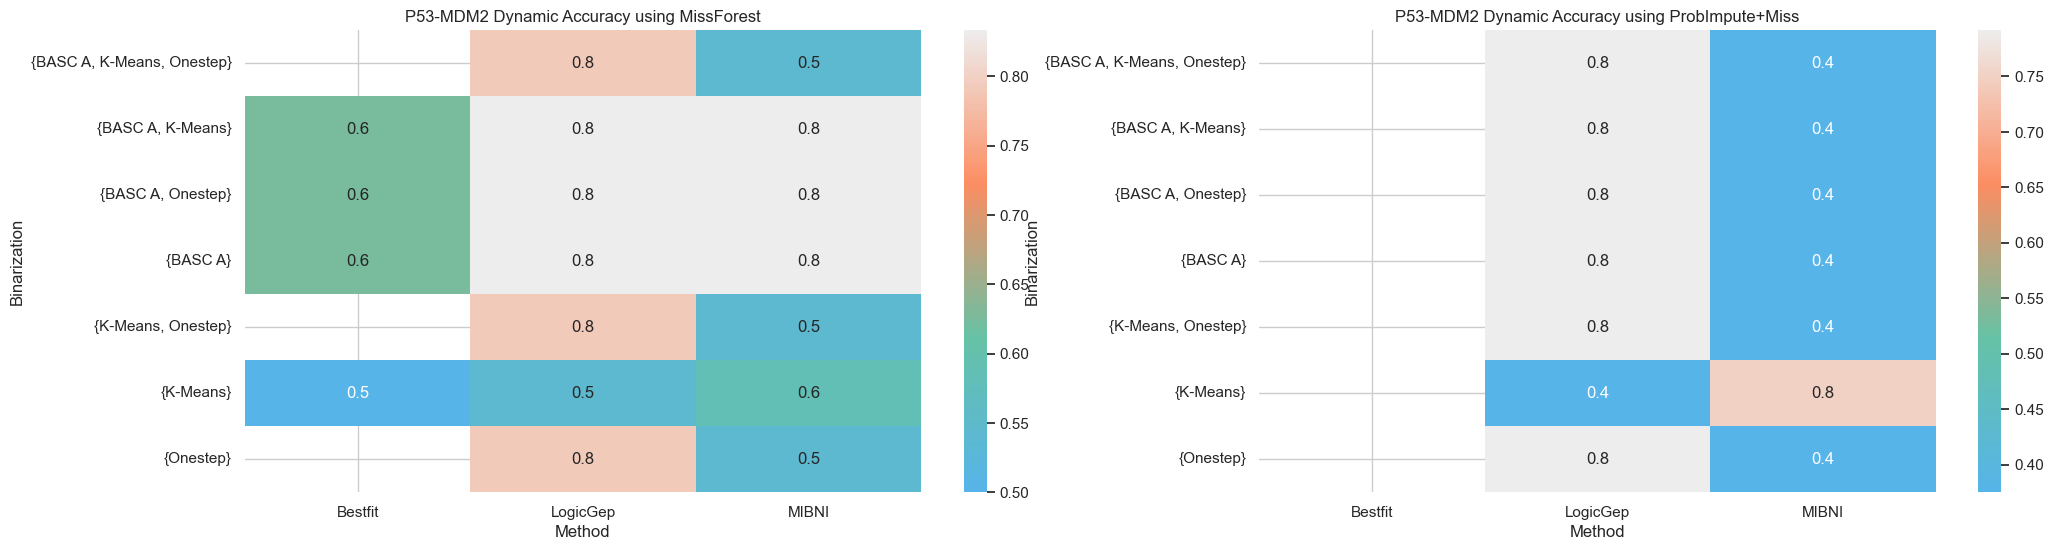

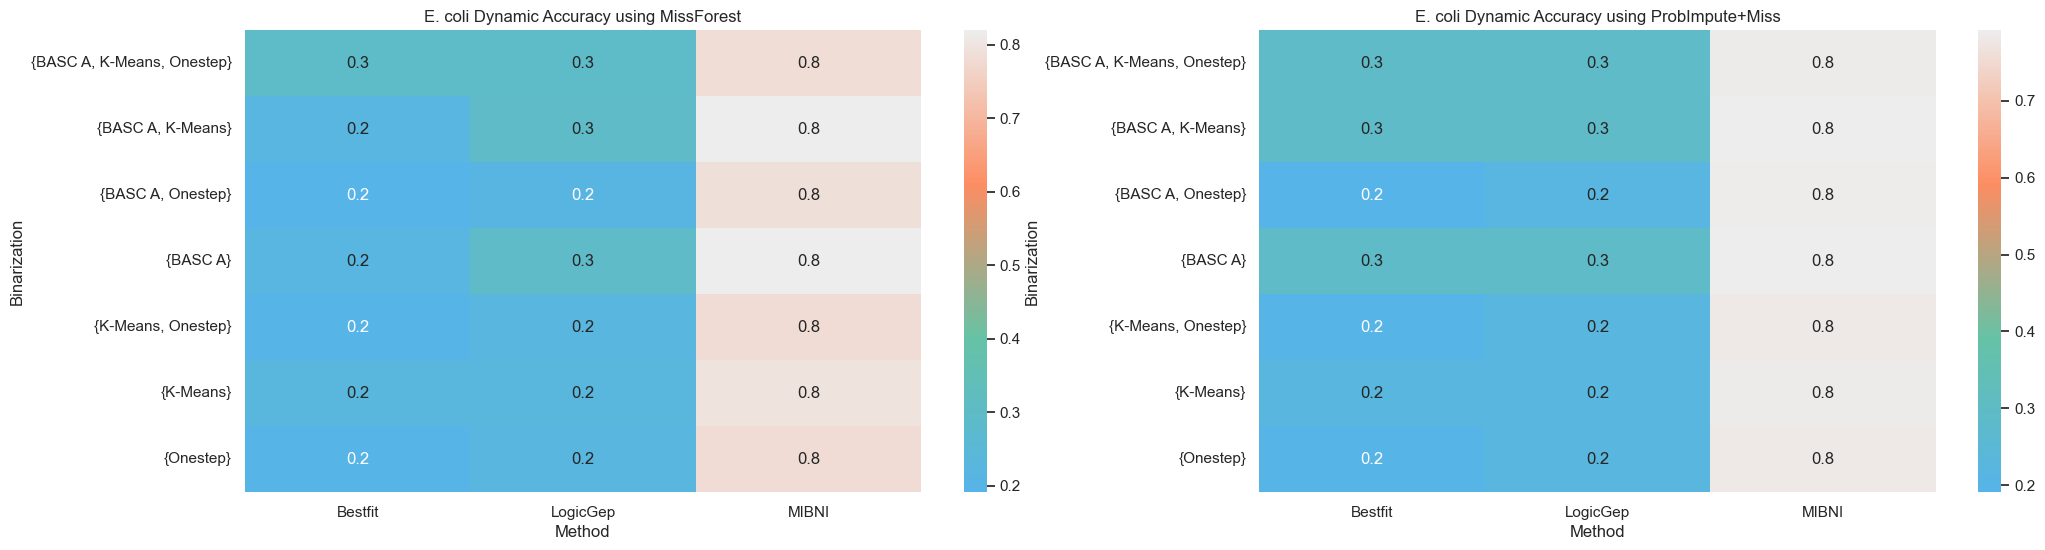

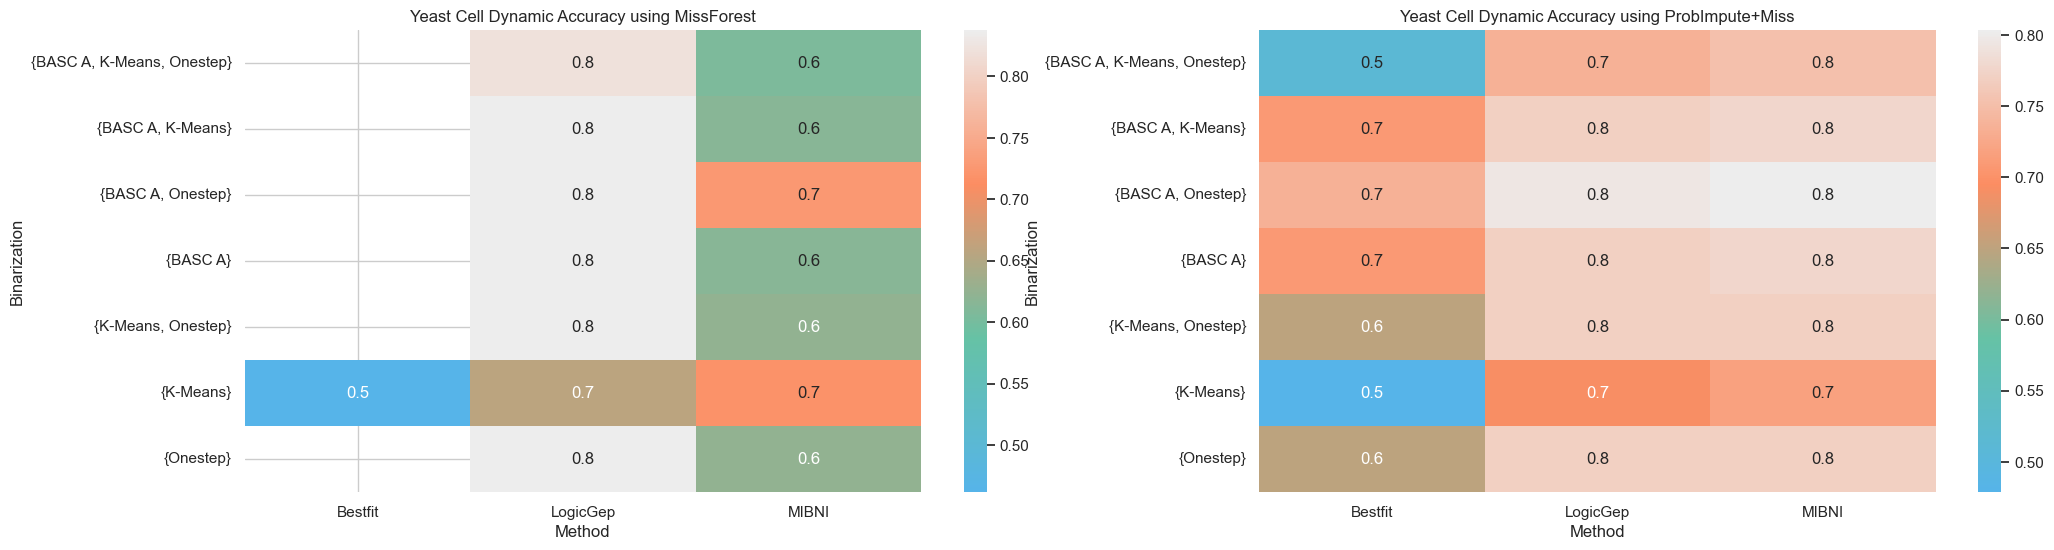

In [15]:
for d in datasets:
    if d == 'yeast_cell':
        label = 'Yeast Cell'
    elif d == 'ecoli_data':
        label = 'E. coli'
    else:
        label = d

    fig, axes = plt.subplots(1, 2, figsize=(24, 6))

    hm1 = heatmapDataMiss[heatmapDataMiss['Dataset']==d].pivot(index="Binarization", columns="Method", values="Dynamic Accuracy")

    sns.heatmap(hm1, annot=True, fmt=".1f", cmap=heatmap_cmap, ax=axes[0], cbar=True)
    axes[0].set_title(f"{label} Dynamic Accuracy using MissForest")

    hm2 = heatmapDataProb[heatmapDataProb['Dataset']==d].pivot(index="Binarization", columns="Method", values="Dynamic Accuracy")

    sns.heatmap(hm2, annot=True, fmt=".1f", cmap=heatmap_cmap, ax=axes[1], cbar=True)
    axes[1].set_title(f"{label} Dynamic Accuracy using ProbImpute+Miss")
    plt.savefig(f"./plots/{label}_dyn_acc.png")
    plt.show()


## Binarization Plots

In [16]:
dfCountGene = pd.read_csv('binCountperGene.csv', index_col=0)
dfCountWhole = pd.read_csv('binCountWholeDataset.csv', index_col=0)

In [17]:
df = dfCountWhole

In [18]:
df.head()

,dataset,binarization,impu,binary,freq
0,P53-MDM2,{BASC A},og_bin,?,16
1,P53-MDM2,{BASC A},og_bin,0,6
2,P53-MDM2,{BASC A},og_bin,1,6
3,P53-MDM2,{BASC A},bin_onlyMissForest,0,19
4,P53-MDM2,{BASC A},bin_onlyMissForest,1,9


In [19]:
df['impu'].unique()

array(['og_bin', 'bin_onlyMissForest', 'bin_Prob_and_MissForest'],
      dtype=object)

In [20]:
df['impu'] = df['impu'].replace({'og_bin': 'Original Bin', 'bin_onlyMissForest': 'MissForest Bin', 'bin_Prob_and_MissForest':'ProbImpute+Miss Bin'})

/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/ym/86bjrcgx2_37dt5zlswrcvn40000gn/T/ipykernel_17746/2855333126.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/ym/86bjrcgx2_37dt5zlswrcvn40000gn/T/ipykernel_17746/2855333126.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/ym/86bjrcgx2_37dt5zlswrcvn40000gn/T/ipykernel_17746/2855333126.py:13: UserWarning: The figure layout has changed to tight
  plt.t

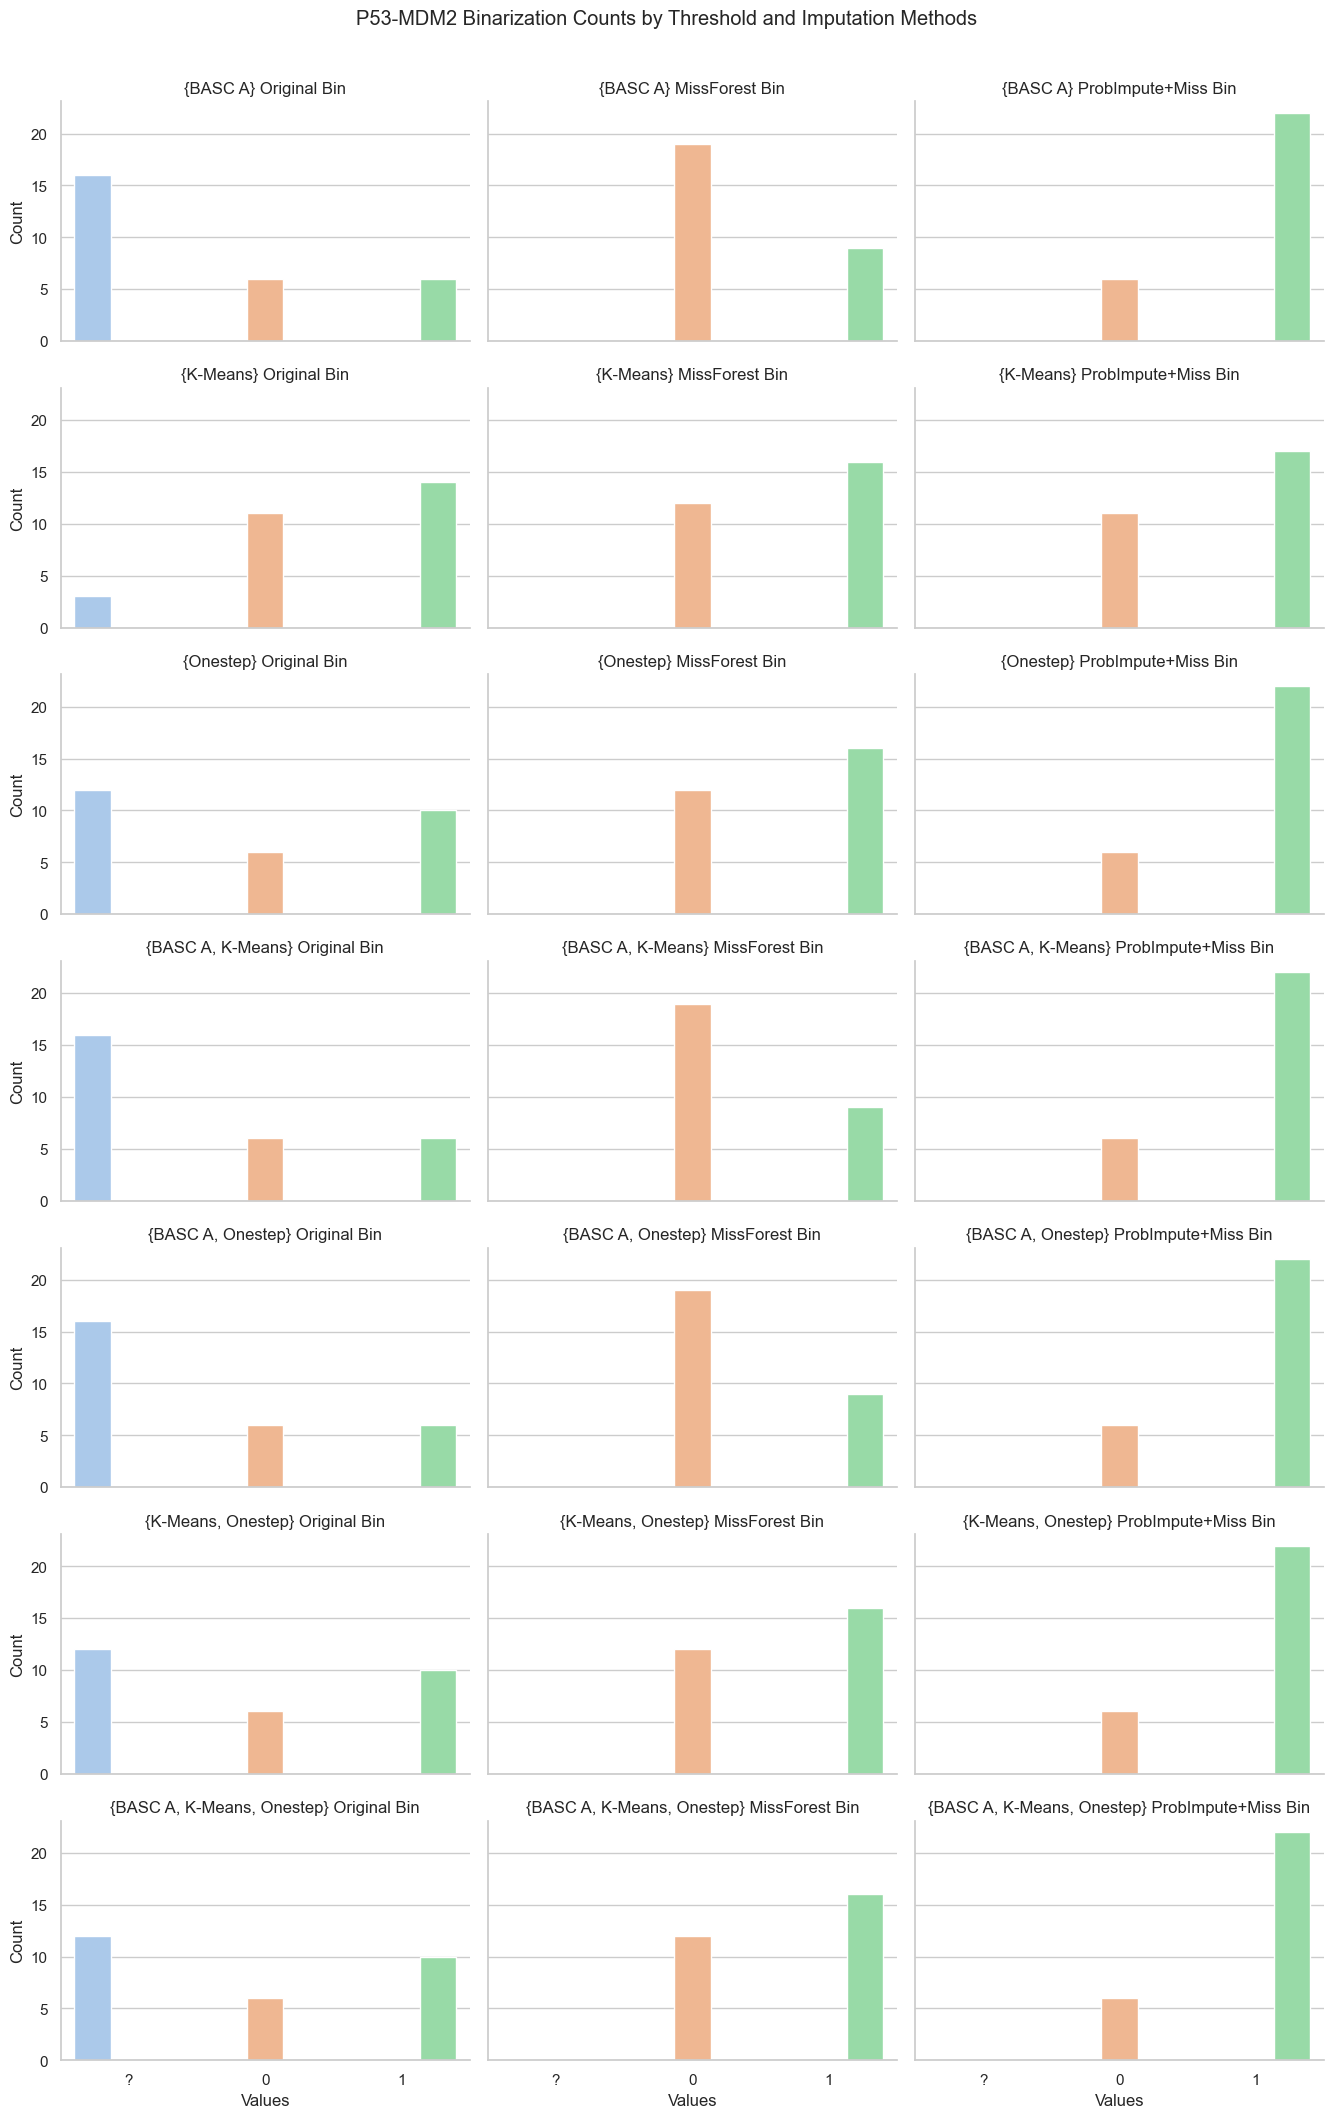

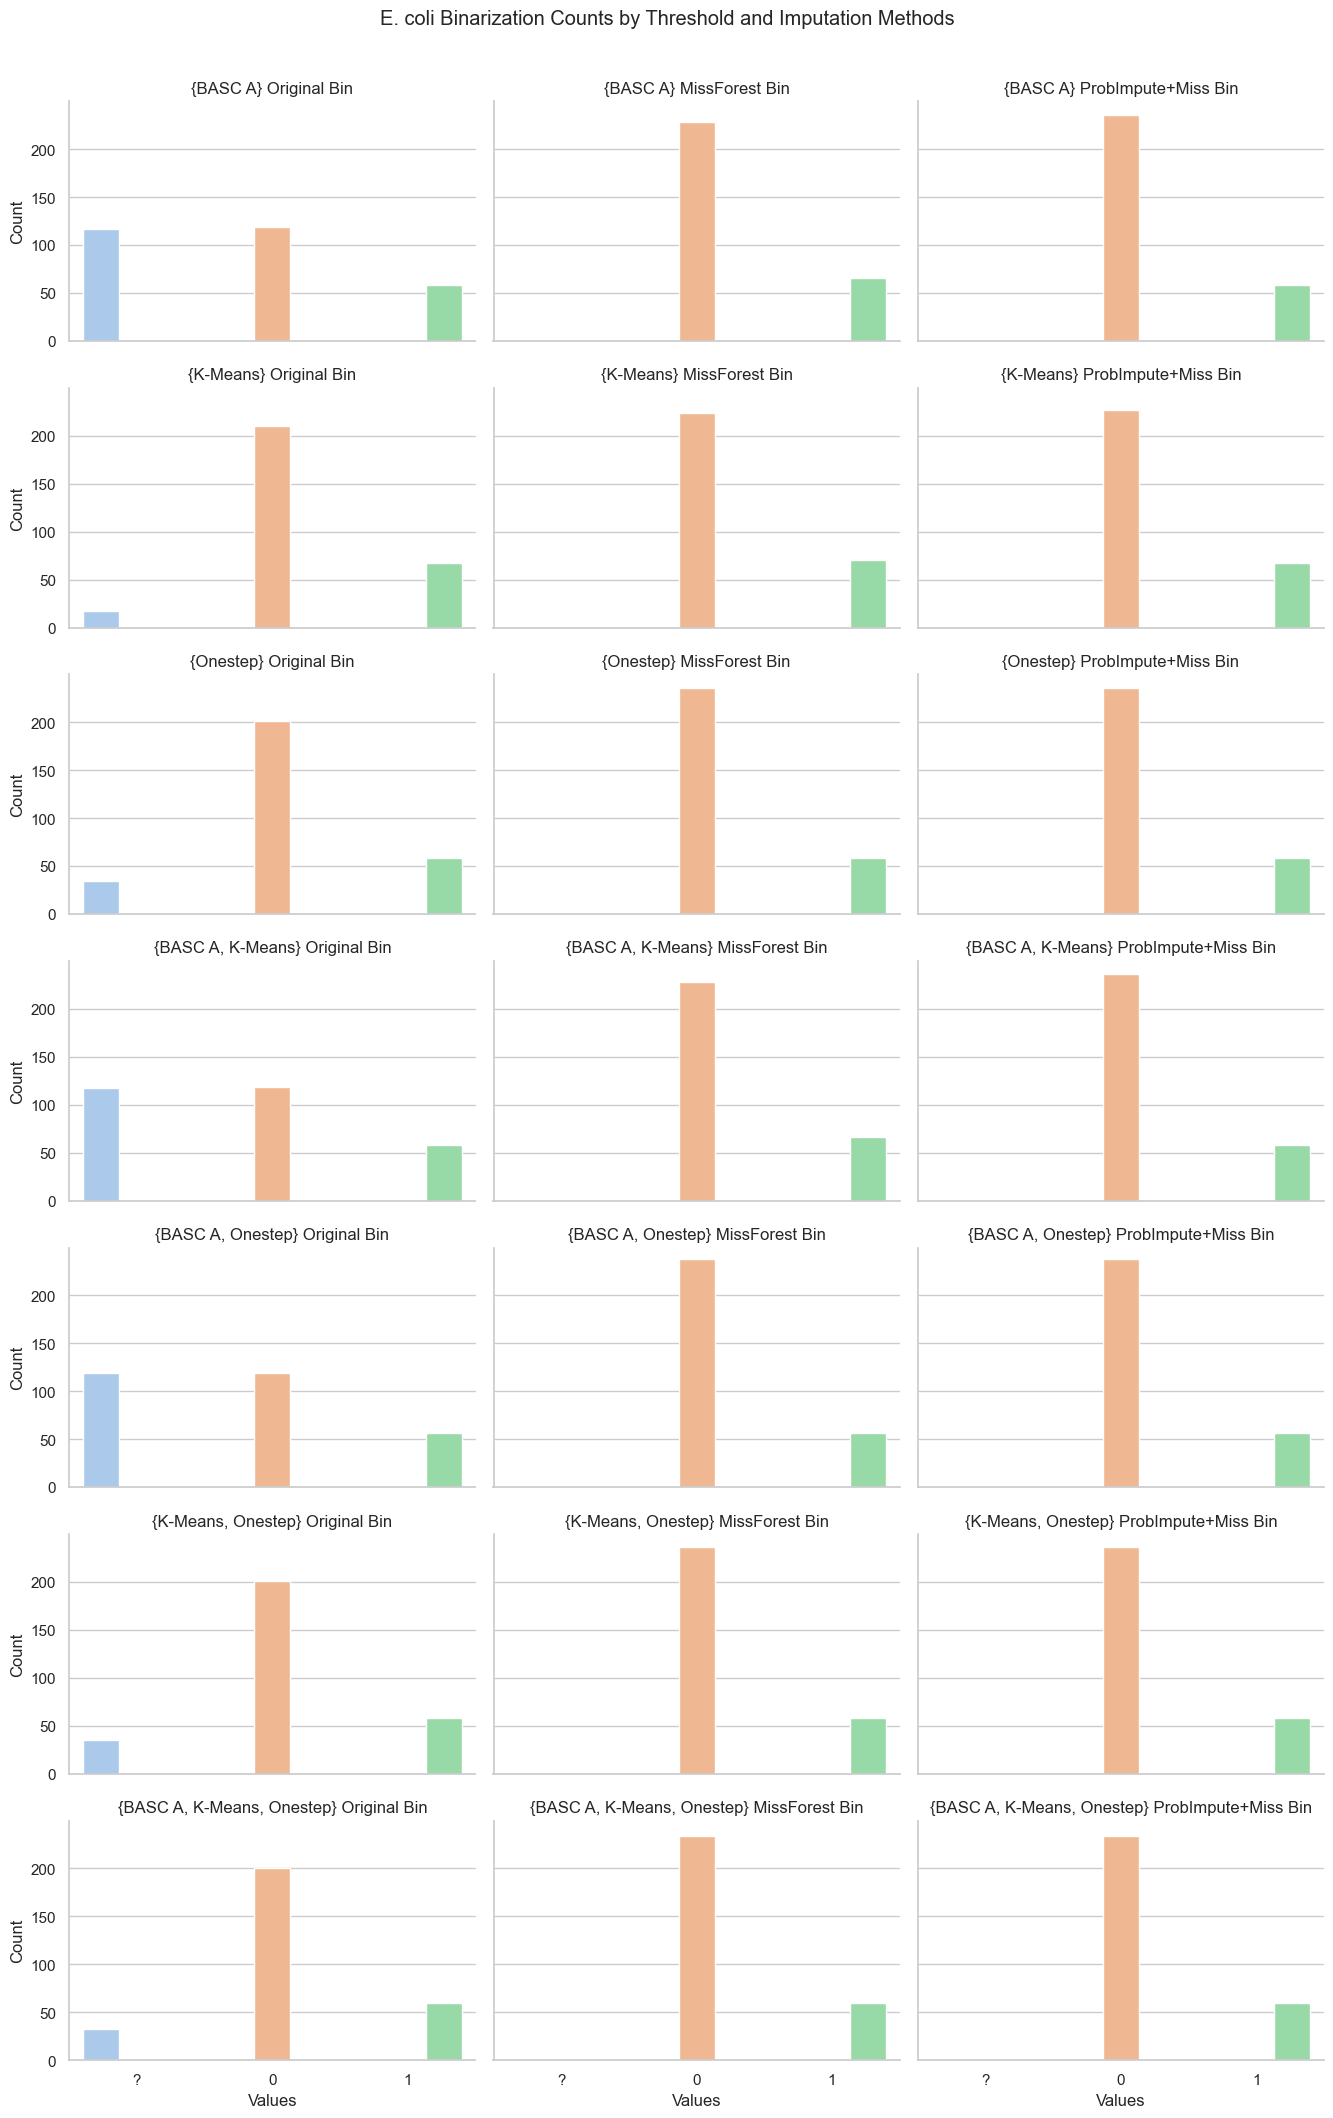

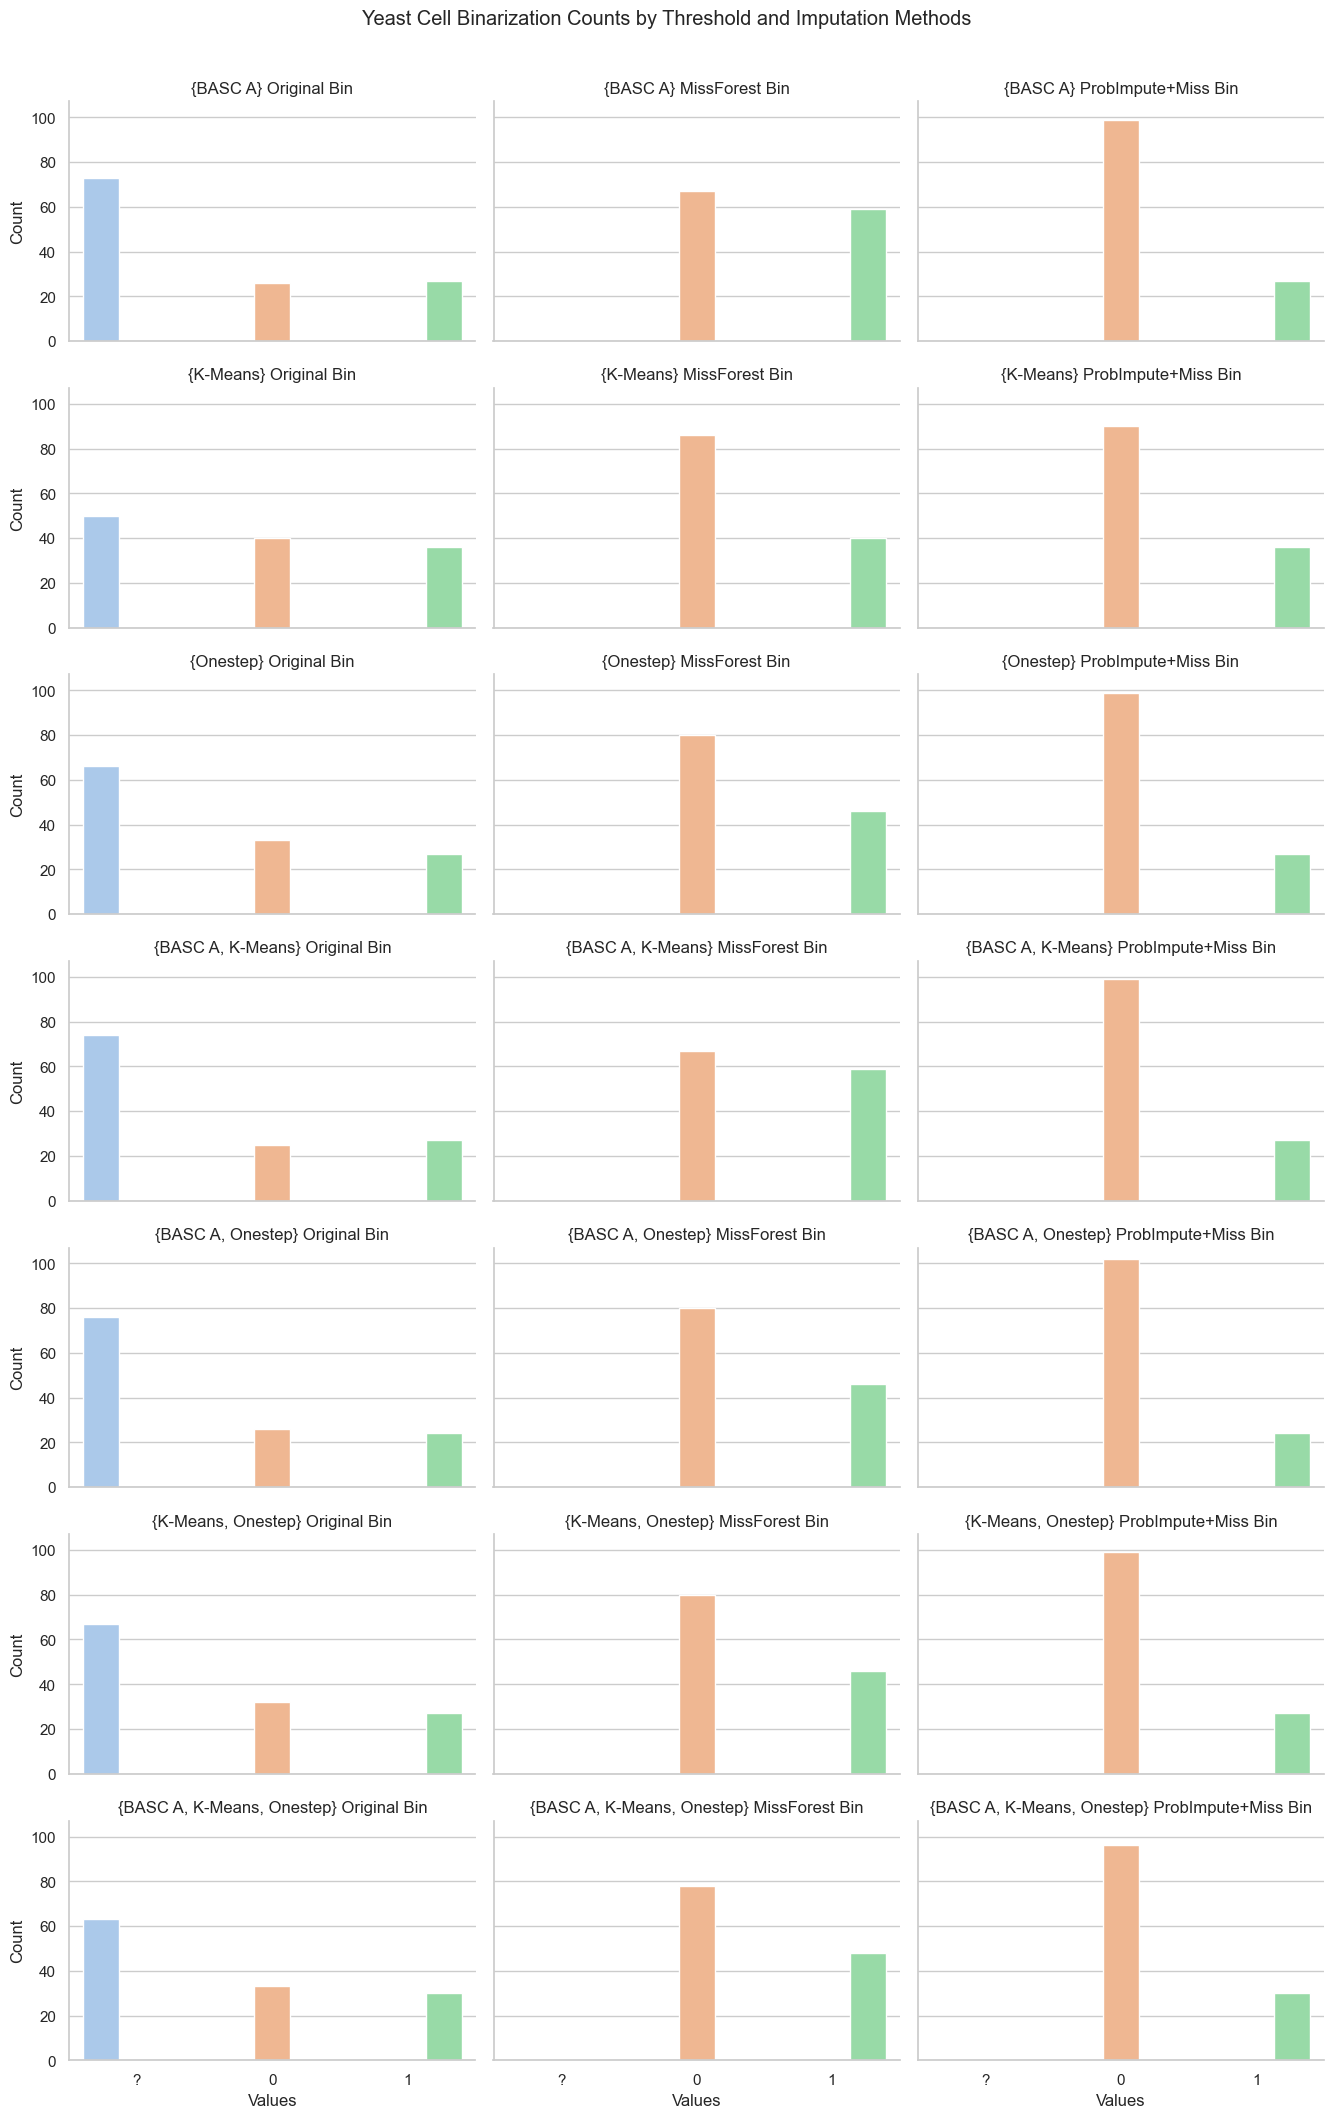

In [21]:
for d in datasets:
    if d == 'yeast_cell':
        label = 'Yeast Cell'
    elif d == 'ecoli_data':
        label = 'E. coli'
    else:
        label = d

    g = sns.catplot(data=df[df['dataset']==d], x="binary", y="freq", row="binarization", col="impu", hue="binary", kind="bar", height=3, aspect=1.5)
    g.set_axis_labels("Values", "Count")
    g.set_titles("{row_name} {col_name}")
    g.fig.suptitle(x=0.5, y=1.008, t=f"{label} Binarization Counts by Threshold and Imputation Methods")
    plt.tight_layout()
    plt.savefig(f"./plots/{label}_bin_counts.png", dpi=300, bbox_inches="tight")

In [22]:
dfCountGene.head()

,gene,binary,count,dataset,binarization,impu
0,ATM,?,3,P53-MDM2,{BASC A},og_bin
1,ATM,0,1,P53-MDM2,{BASC A},og_bin
2,ATM,1,3,P53-MDM2,{BASC A},og_bin
3,MDM2,?,5,P53-MDM2,{BASC A},og_bin
4,MDM2,0,1,P53-MDM2,{BASC A},og_bin


In [23]:
df2 = dfCountGene[(dfCountGene['dataset']=='ecoli_data') & (dfCountGene['impu']=='og_bin')].reset_index(drop=True)

In [24]:
df2

,gene,binary,count,dataset,binarization,impu
0,lexA,?,21,ecoli_data,{BASC A},og_bin
1,lexA,0,22,ecoli_data,{BASC A},og_bin
2,lexA,1,6,ecoli_data,{BASC A},og_bin
3,polB,?,8,ecoli_data,{BASC A},og_bin
4,polB,0,20,ecoli_data,{BASC A},og_bin
...,...,...,...,...,...,...
121,uvrA,0,41,ecoli_data,"{BASC A, K-Means, Onestep}",og_bin
122,uvrA,1,6,ecoli_data,"{BASC A, K-Means, Onestep}",og_bin
123,uvrD,?,13,ecoli_data,"{BASC A, K-Means, Onestep}",og_bin
124,uvrD,0,23,ecoli_data,"{BASC A, K-Means, Onestep}",og_bin


/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


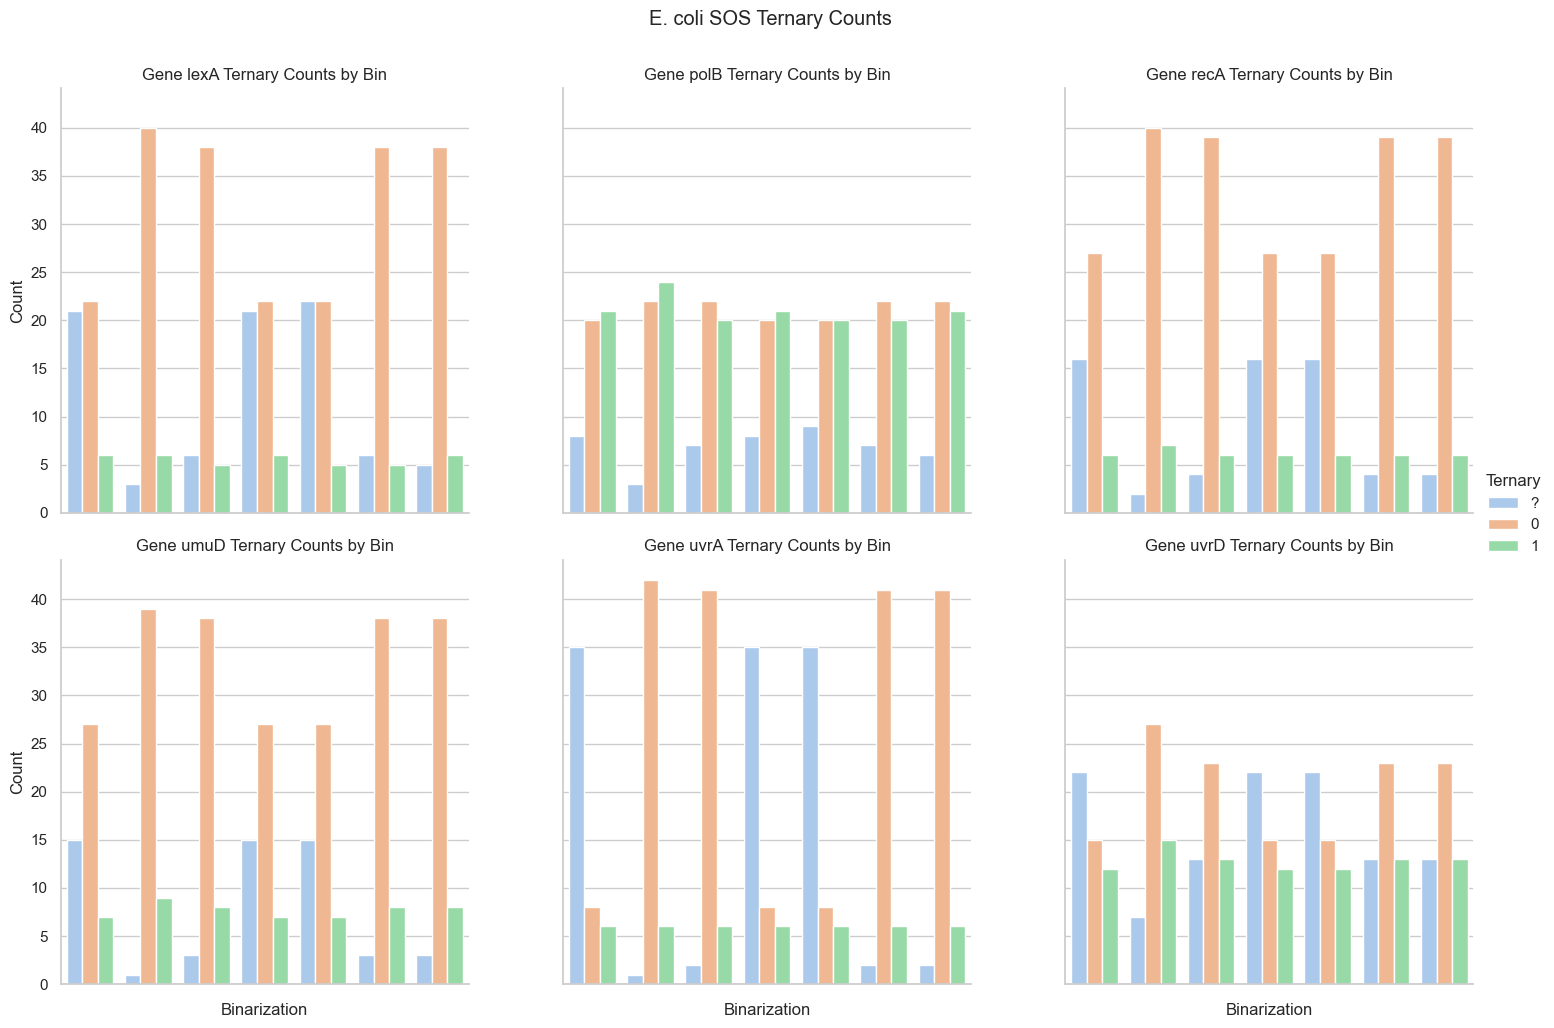

In [25]:
g = sns.catplot(data=df2, x="binarization", y="count", col="gene", hue="binary", kind="bar", col_wrap=3)
g.set_axis_labels("Binarization", "Count")
g.set_titles("Gene {col_name} Ternary Counts by Bin")
g.set_xticklabels(rotation=90, horizontalalignment='right')
g._legend.set_title("Ternary")
g.fig.suptitle("E. coli SOS Ternary Counts", y=1.04)
plt.savefig(f"./plots/ecoli_gene_count.png", dpi=300, bbox_inches="tight")

/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mterrefortes/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


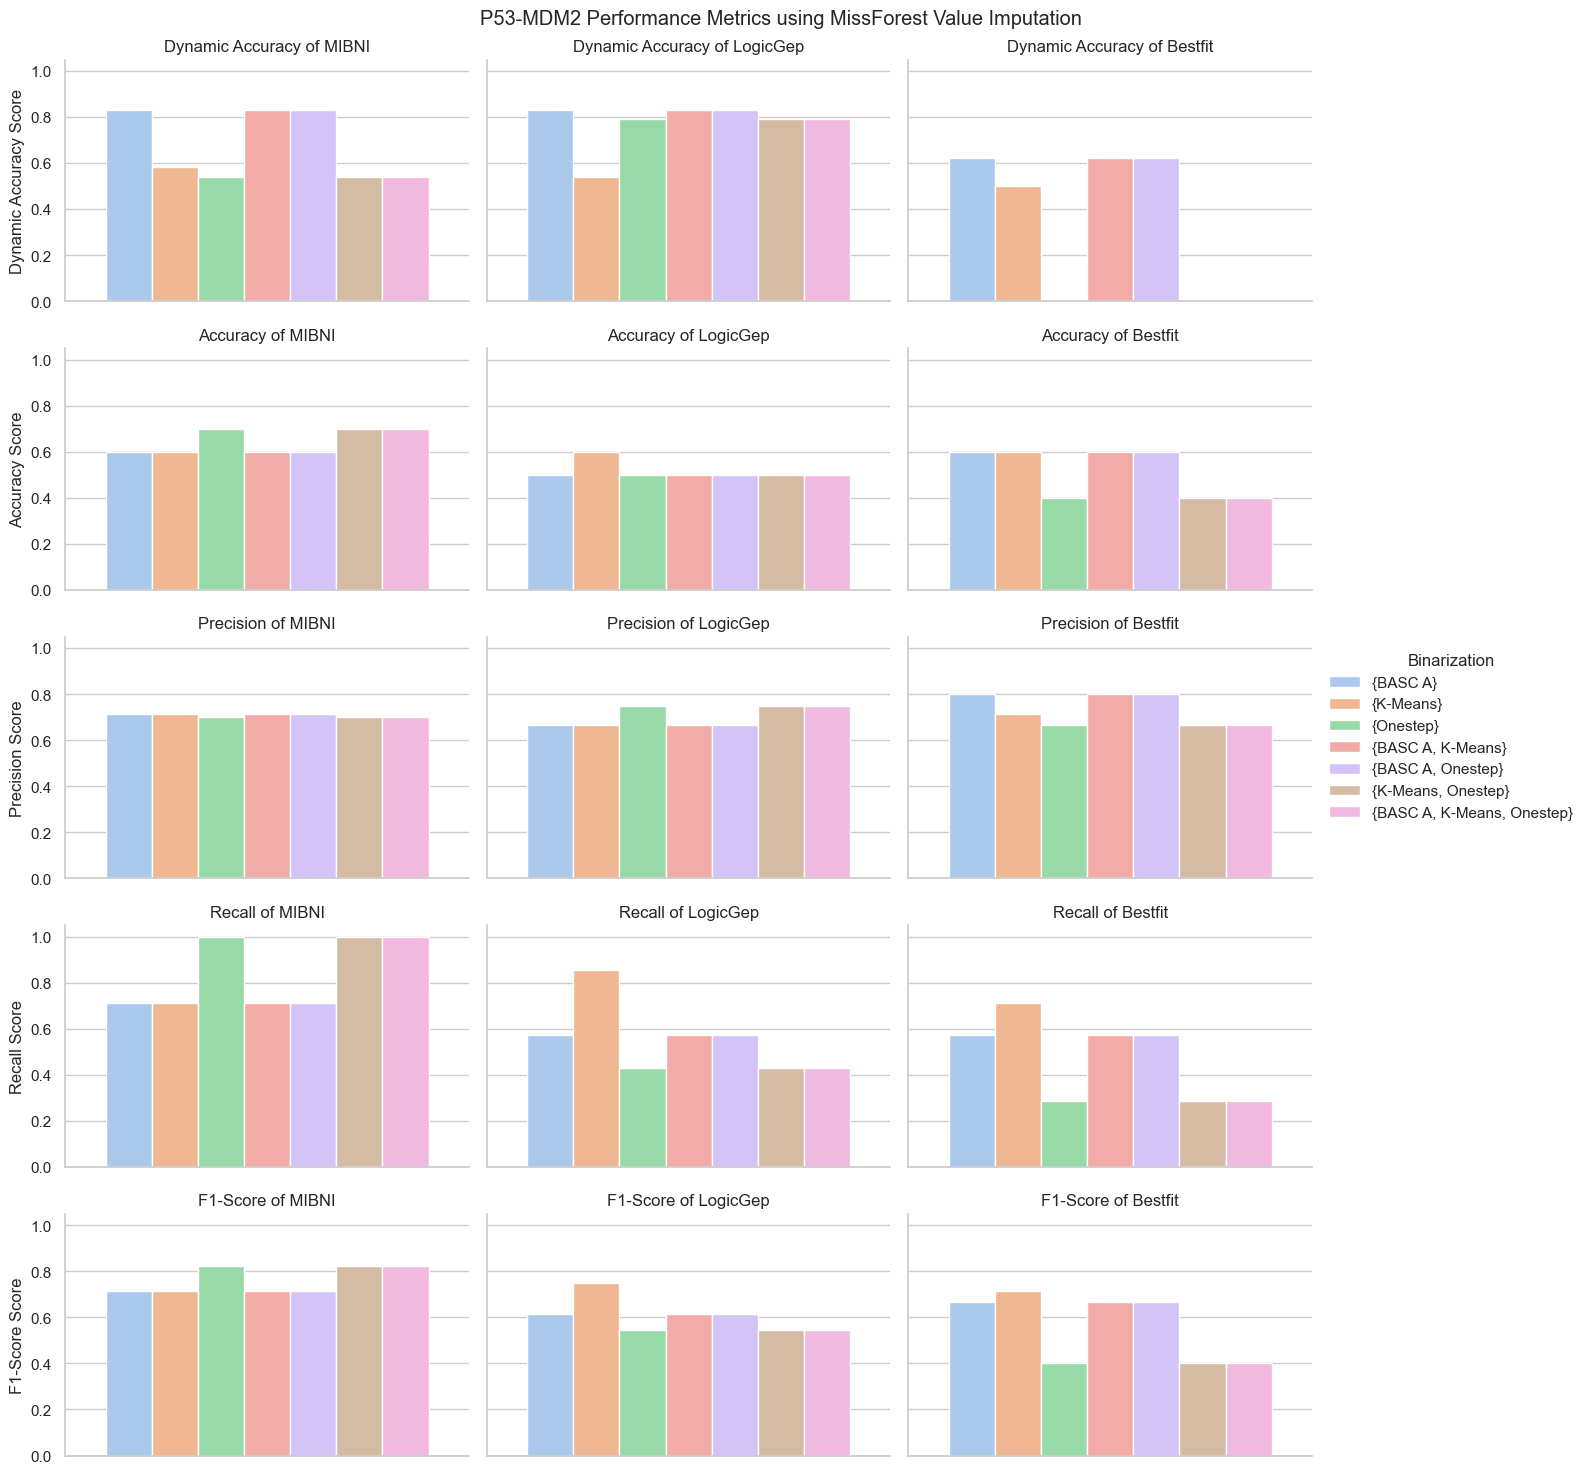

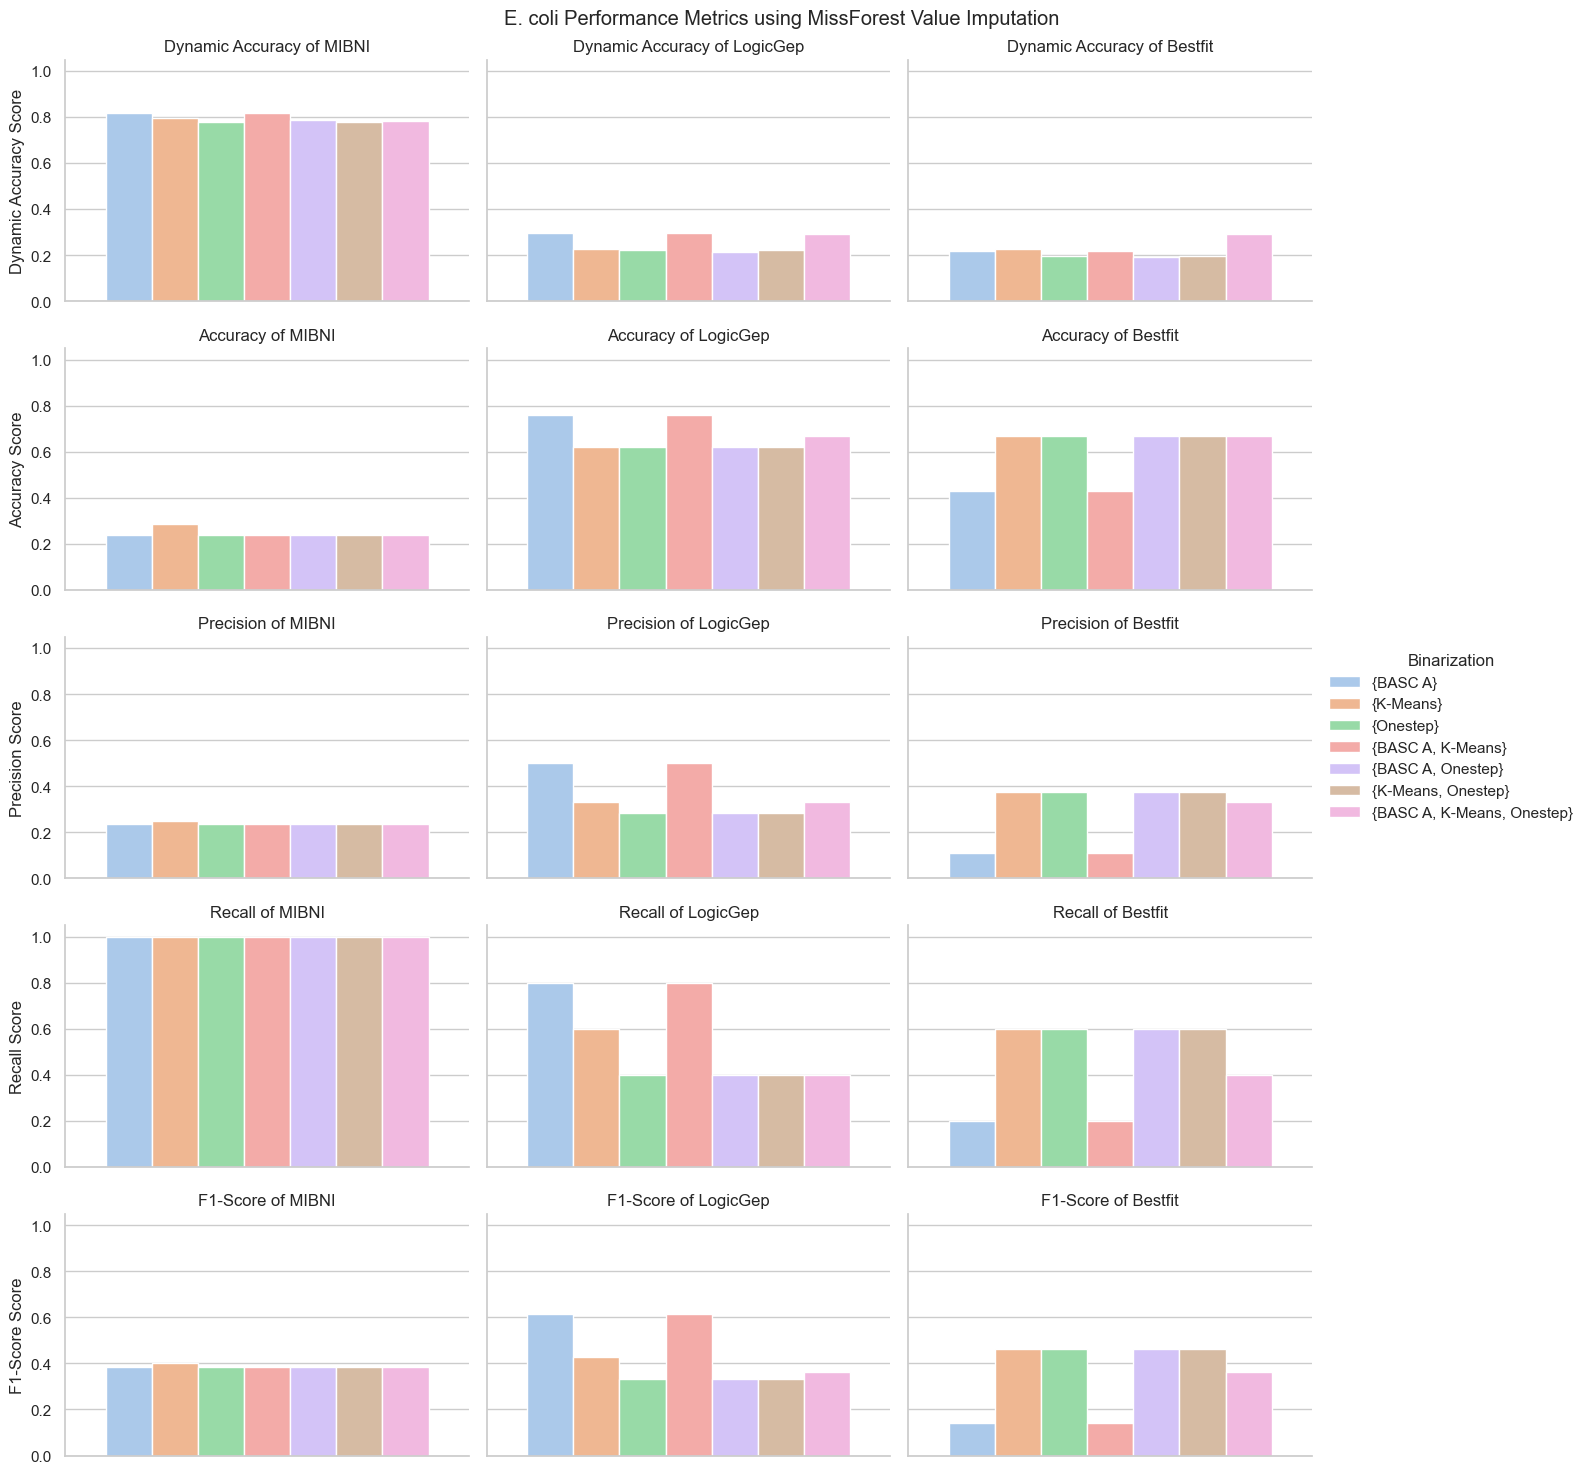

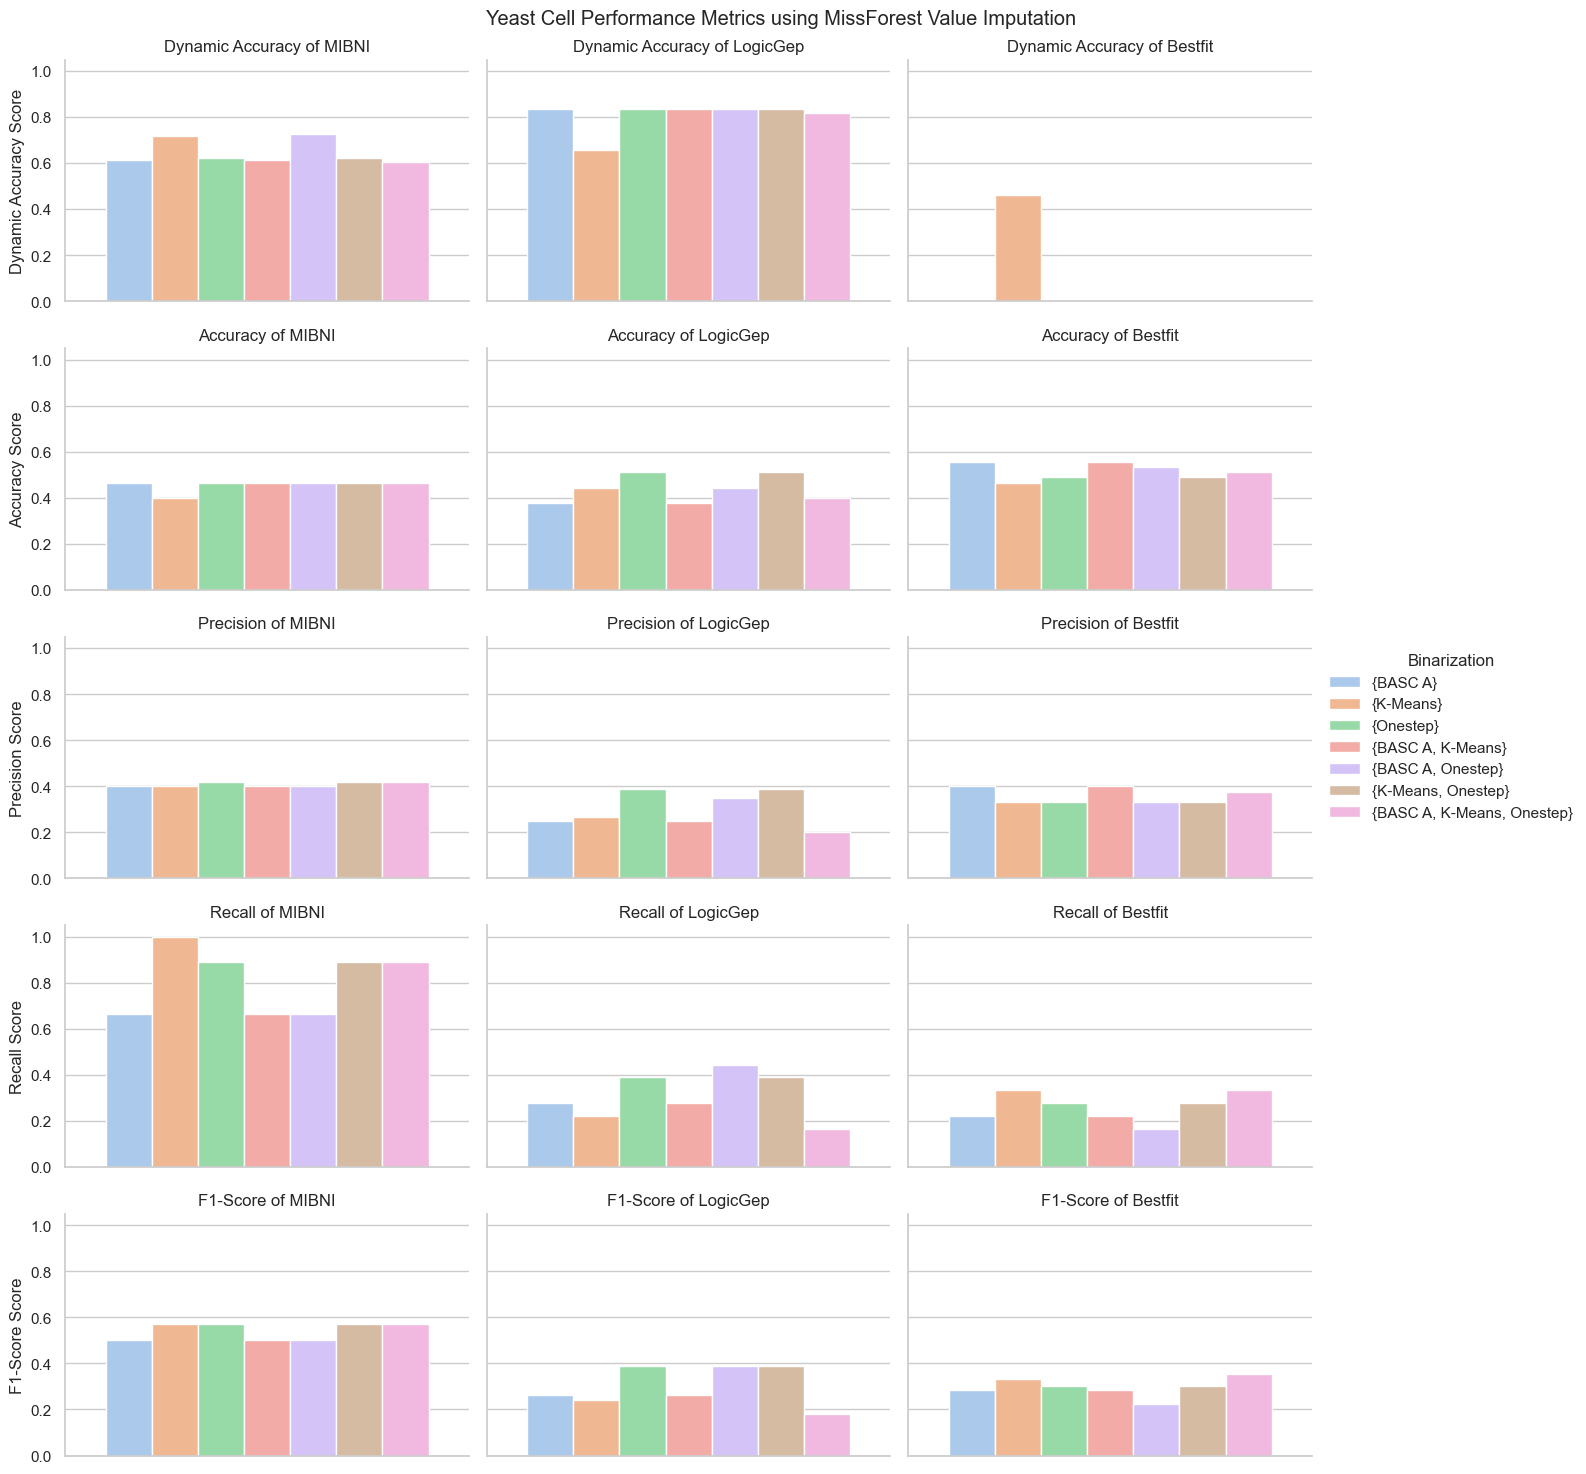

In [47]:
#gridplot showing the metrics by inference method and imputation method

row_labels = ["Dynamic Accuracy", "Accuracy", "Precision", "Recall", "F1-Score"]

datasets = list(dfMetrics1['dataset'].unique())

dfMetricMiss = dfMetrics1[dfMetrics1['Imputation']=="MissForest"]

for d in datasets:
    if d == 'yeast_cell':
        label = 'Yeast Cell'
    elif d == 'ecoli_data':
        label = 'E. coli'
    else:
        label = d
    g = sns.catplot(data=dfMetricMiss[dfMetricMiss['dataset']==d], x="Imputation", y="Score", row="Performance Metric", col="Method", hue="Binarization", kind="bar", height=3, aspect=1.5)
    #g.set_axis_labels("Imputation Method")
    for ax in g.axes.flatten():
        ax.set_xlabel("")
        ax.tick_params(axis='x', labelbottom=False)
    
    for ax, label_row in zip(g.axes[:, 0], row_labels):
        ax.set_ylabel(f"{label_row} Score", fontsize=12)
    #g.fig.text(0.5, 0.01, "Binarizations with MissForest Value Imputation", ha="center", fontsize=12)
    g.set_titles("{row_name} of {col_name}")
    g.fig.suptitle(x=0.5, y=1.008, t=f'{label} Performance Metrics using MissForest Value Imputation')
    #plt.savefig(f"./plots/{label}_Performance_Metrics.png", dpi=300, bbox_inches="tight")
    plt.savefig(f"./performance_{d}.png", dpi=300, bbox_inches="tight")

In [27]:
dfCountOG = df[df['impu'] == 'Original Bin']

In [28]:
list(dfCountOG['binarization'].unique())

['{BASC A}',
 '{K-Means}',
 '{Onestep}',
 '{BASC A, K-Means}',
 '{BASC A, Onestep}',
 '{K-Means, Onestep}',
 '{BASC A, K-Means, Onestep}']

In [29]:
labels_bin = {'{BASC A}':'{BASC A}',
 '{K-Means}':'{K-Means}',
 '{Onestep}':'{Onestep}',
 '{BASC A, K-Means}':'{B, K}',
 '{BASC A, Onestep}':'{B, O}',
 '{K-Means, Onestep}': '{K, O}',
 '{BASC A, K-Means, Onestep}':'{B, K, O}'}

labels_impu = {'og_bin':'Original Bin', 'bin_onlyMissForest': 'MissForest Bin'}

In [30]:
dfCountOG['binarization'] = dfCountOG['binarization'].replace(labels_bin)

/var/folders/ym/86bjrcgx2_37dt5zlswrcvn40000gn/T/ipykernel_17746/33620323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCountOG['binarization'] = dfCountOG['binarization'].replace(labels_bin)


In [31]:
dfCountGene['binarization'] = dfCountGene['binarization'].replace(labels_bin)
dfCountGene['impu'] = dfCountGene['impu'].replace(labels_impu)

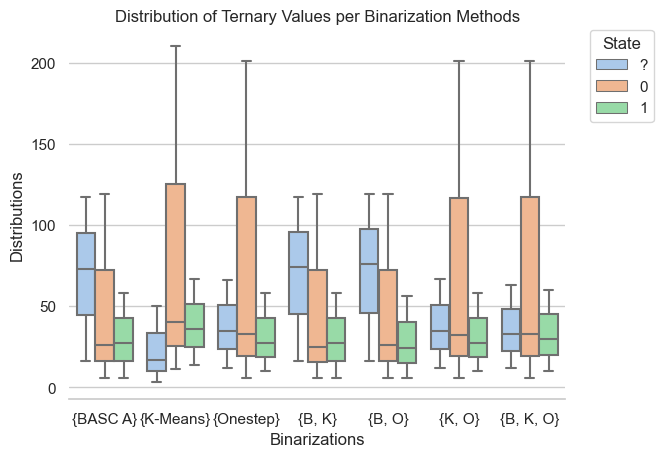

In [32]:
ax = sns.boxplot(data=dfCountOG, x="binarization", y="freq", hue="binary").set(title='Distribution of Ternary Values per Binarization Methods')
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.xlabel("Binarizations")
plt.ylabel("Distributions")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig(f"./distribution_ternary.png", dpi=300, bbox_inches="tight")


In [33]:
def plot_counts(df_wide, bin_methods, genes, imputations, name, r,c, size1, size2):

  n_groups = len(bin_methods)      # number of x-axis groups
  n_bars_per_group = 2  # bars per group (og_bin vs imputation)

  bar_width = 0.35
  group_width = n_bars_per_group * bar_width

  group_pos = np.arange(n_groups) 

  colors = {'?':'#56B4E9', '0':'#FC8D62', '1':'#66c2a5'}
  states = ['?','0','1']
  # alpha_map = {'og_bin':1.0, 'bin_onlyMissForest':0.7, 'bin_Prob_and_MissForest':0.4}
  hatch_map = {'Original Bin':'', 'MissForest Bin':'\\'}

  fig, ax = plt.subplots(r,c, figsize=(size1,size2))
  index = 0
  #print(genes)

  for row in ax:
    
    for col in row:
      gene = genes[index]
      for i, imp in enumerate(imputations):
          # positions for this imputation method
          pos = group_pos - group_width/2 + i*bar_width + bar_width/2
          
          for j, bin_m in enumerate(bin_methods):
              bottom = 0
              for state in states:
                  if state in df_wide.columns:
                      val = df_wide.loc[(bin_m, imp, gene), state]
                      col.bar(pos[j], val, bottom=bottom, width=bar_width,color=colors[state],hatch=hatch_map[imp])
                      bottom += val
                      #print(bin_m, imp, state, val)
      index += 1
      # x-axis labels
      col.set_xticks(group_pos)
      col.set_xticklabels(bin_methods)
      col.set_xlabel("Binarization Method")
      col.set_ylabel("Count")
      col.set_title(f"Counts by Imputation Method - Gene {gene}")
      sns.despine(left=True)

      # legend1=fig.legend(states, title="State", title_fontsize=8,loc='upper left', bbox_to_anchor=(0.98,0.95),fontsize=8,frameon=False)
      import matplotlib.patches as mpatches
      from matplotlib.patches import Rectangle

      state_patches = [mpatches.Patch(color=colors[s], label=s) for s in states]
      legend1 = fig.legend(handles=state_patches, title='State', title_fontsize=8,loc='upper left',bbox_to_anchor=(0.98,0.95),fontsize=8,frameon=False)
      col.add_artist(legend1)  # Keep this legend while adding another

      imp_patches = [mpatches.Patch(facecolor='white',edgecolor='black', hatch=hatch_map[imp], label=imp) 
                    for imp in imputations]

      fig.legend(handles=imp_patches,  ncol=3, loc="lower center",fontsize=10,frameon=False,bbox_to_anchor=(0.5,-0.05))

  plt.tight_layout()
  plt.savefig(f"./counts_{name}.png", dpi=300, bbox_inches="tight")
  plt.show()

In [34]:
dfCountGene

,gene,binary,count,dataset,binarization,impu
0,ATM,?,3,P53-MDM2,{BASC A},Original Bin
1,ATM,0,1,P53-MDM2,{BASC A},Original Bin
2,ATM,1,3,P53-MDM2,{BASC A},Original Bin
3,MDM2,?,5,P53-MDM2,{BASC A},Original Bin
4,MDM2,0,1,P53-MDM2,{BASC A},Original Bin
...,...,...,...,...,...,...
886,SWI4,1,2,yeast_cell,"{B, K, O}",bin_Prob_and_MissForest
887,SWI5,0,7,yeast_cell,"{B, K, O}",bin_Prob_and_MissForest
888,SWI5,1,7,yeast_cell,"{B, K, O}",bin_Prob_and_MissForest
889,SWI6,0,11,yeast_cell,"{B, K, O}",bin_Prob_and_MissForest


In [35]:
dfCountData = dfCountGene[dfCountGene['impu'] != 'bin_Prob_and_MissForest']

In [36]:
imputations = ['Original Bin', 'MissForest Bin']

In [37]:
dfCountData

,gene,binary,count,dataset,binarization,impu
0,ATM,?,3,P53-MDM2,{BASC A},Original Bin
1,ATM,0,1,P53-MDM2,{BASC A},Original Bin
2,ATM,1,3,P53-MDM2,{BASC A},Original Bin
3,MDM2,?,5,P53-MDM2,{BASC A},Original Bin
4,MDM2,0,1,P53-MDM2,{BASC A},Original Bin
...,...,...,...,...,...,...
868,SWI4,1,2,yeast_cell,"{B, K, O}",MissForest Bin
869,SWI5,0,5,yeast_cell,"{B, K, O}",MissForest Bin
870,SWI5,1,9,yeast_cell,"{B, K, O}",MissForest Bin
871,SWI6,0,11,yeast_cell,"{B, K, O}",MissForest Bin


['ATM', 'MDM2', 'WIP1', 'p53']


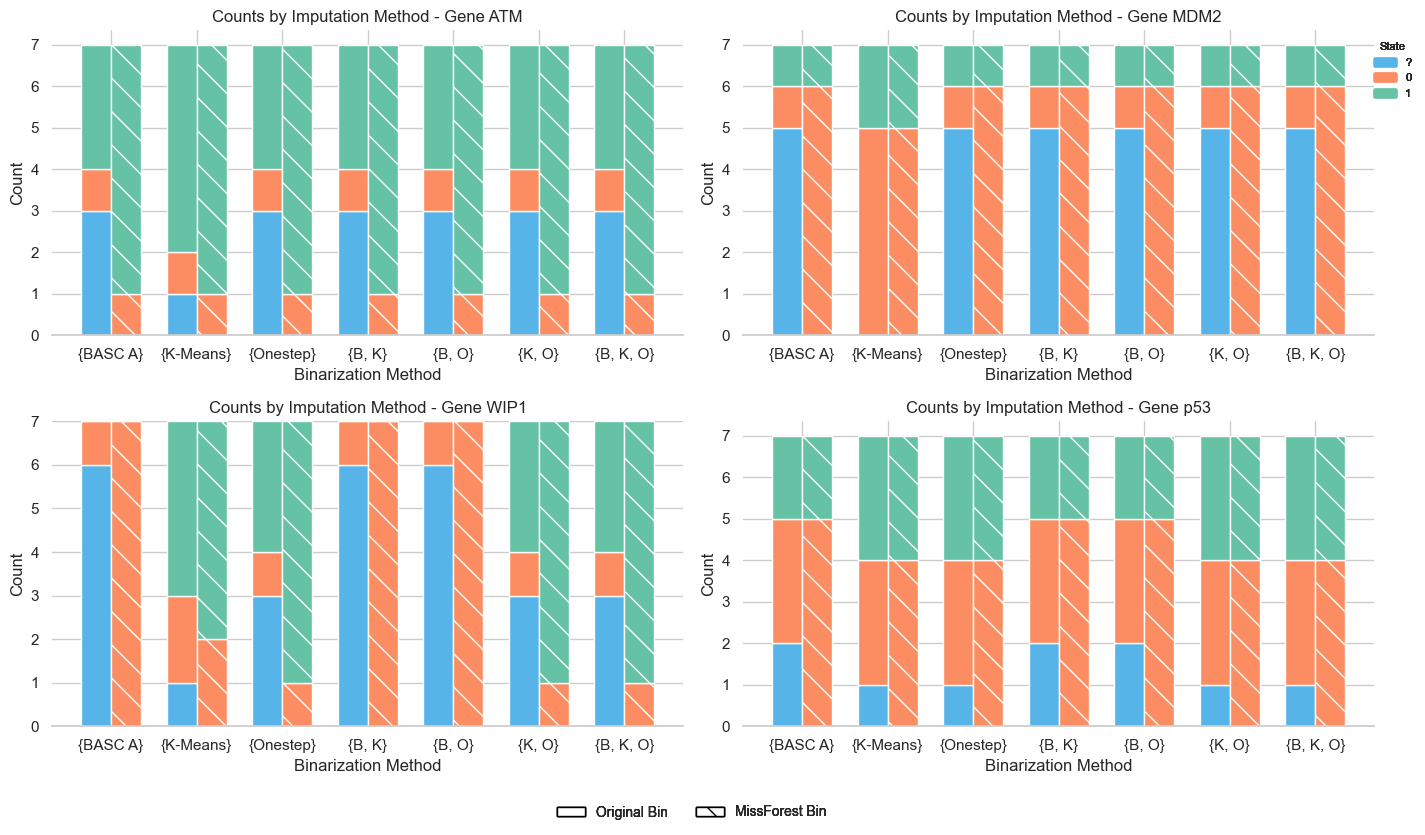

['lexA', 'polB', 'recA', 'umuD', 'uvrA', 'uvrD']


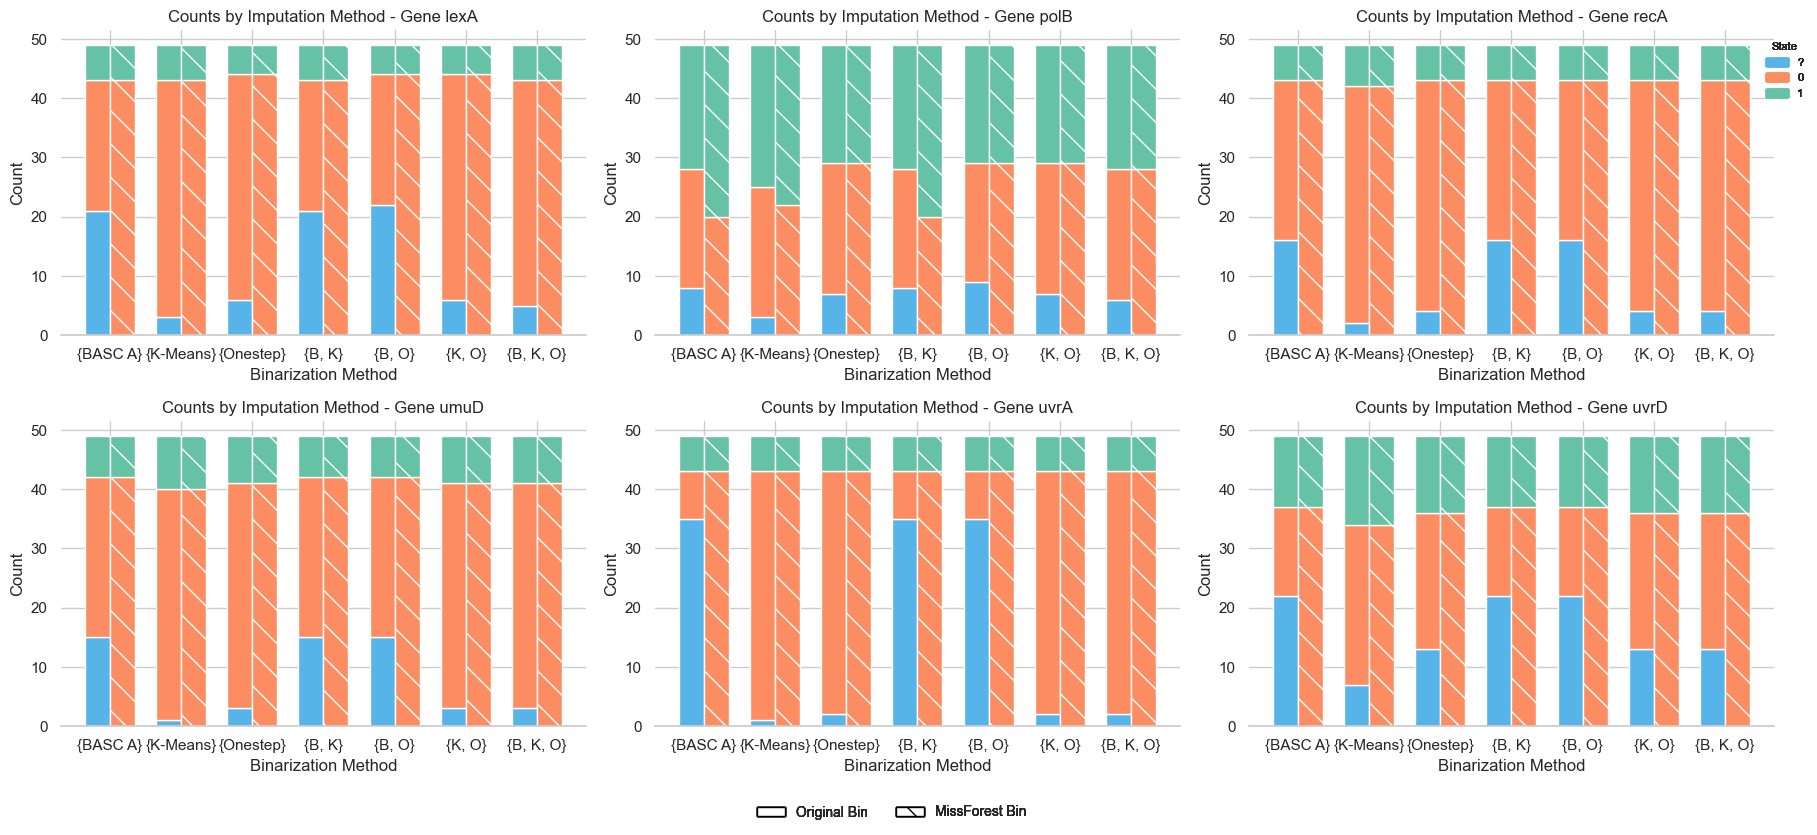

['ACE2', 'CLN3', 'FKH2', 'MBP1', 'MCM1', 'NDD1', 'SWI4', 'SWI5', 'SWI6']


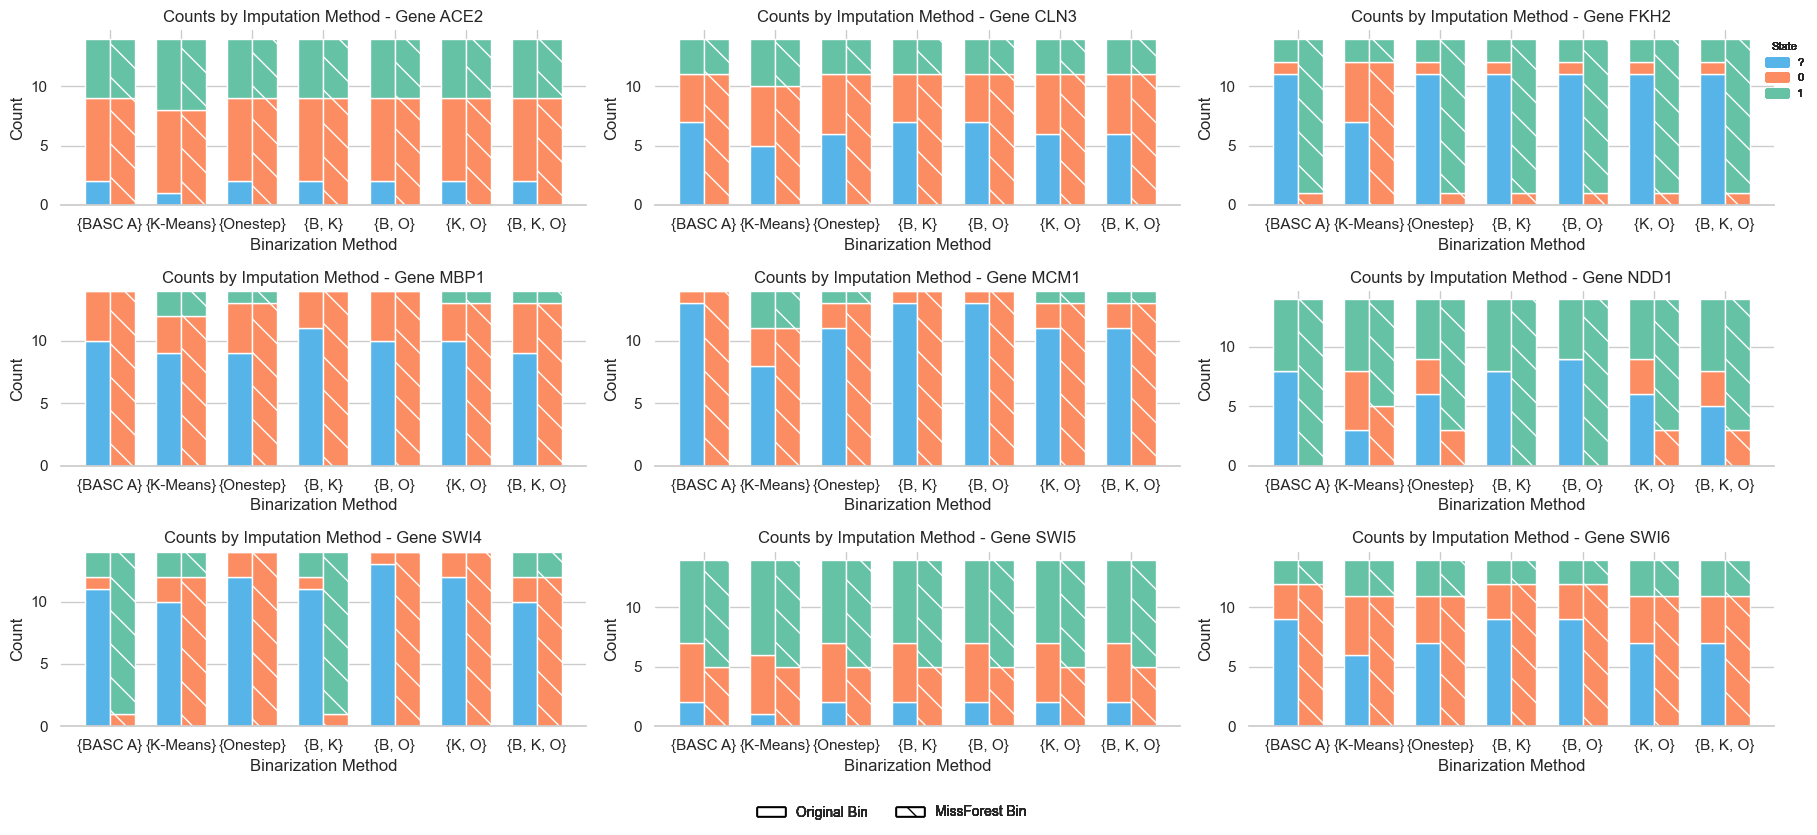

In [38]:
for d in datasets:
    
    dfD = dfCountData[dfCountData['dataset']==d]
    
    bin_methods = list(dfD['binarization'].unique())
    genes = list(dfD['gene'].unique())
    
    print(genes)
    
    df_wide = (
        dfD.pivot_table(index=["gene", "dataset", "binarization", "impu"], columns="binary", values="count", fill_value=0).reset_index())


    df_wide = df_wide.loc[:, ["gene", "dataset", "binarization", "impu", "0", "1", "?"]]
    df_wide = df_wide.set_index(["binarization", "impu", "gene"])
    
    if d == 'P53-MDM2':
        name = 'p53-MDM2'
        r, c = 2,2
        size1,size2 = 14,8
    elif d == 'ecoli_data':
        name = 'E. coli'
        r,c = 2,3
        size1,size2 = 18,8
    else:
        name = 'Yeast Cell'
        r,c = 3,3
        size1,size2 = 18,8
        
    
    plot_counts(df_wide, bin_methods, genes, imputations, name, r,c, size1, size2)
    